 <h1 align="center"> AML Group Project:</h1>   <h1 align="center"> ML Classifier for IoT Intrusion Detection </h1> 

• Odise Vila <br>
• Rabia Shah <br>
• Delvin Monzon <br>
• Canio Alberto Maggio <br>
• Marco Palermo <br>


<div style="text-align: right"> 15th Nov 2019 </div>

In [1]:
%matplotlib inline
#import the necessary packages
from matplotlib import pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
#import theano
import keras
import seaborn as sns
#import graphviz
import pydot
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# 1 - Pre-Processing
## Loading the Dataset 

In [2]:
# Load CSV files using Pandas
filename_train = 'train_imperson_without4n7_balanced_data.csv'
filename_test = 'test_imperson_without4n7_balanced_data.csv'
df = pd.read_csv(filename_train) #training
df_test = pd.read_csv(filename_test) #testing

#create a backup of the dataframes before changing them
df_backup = df.copy()
df_test_backup = df_test.copy()

# change pandas default settings 
# to display all the rows and colummns in the dataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(df.shape)
print(df_test.shape)

(97044, 153)
(40158, 153)


# Descriptive Statistics

In [3]:
df.describe()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
count,97044.0,97044.0,97044.0,97044.000000,97044.000000,97044.000000,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.000000,97044.000000,97044.0,97044.000000,97044.0,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.0,97044.0,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.0,97044.0,97044.0,97044.000000,97044.000000,97044.0,97044.000000,97044.000000,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.000000,97044.0,97044.000000,97044.0,97044.000000,97044.000000,97044.000000,97044.0,97044.000000,97044.00000,97044.000000,97044.000000,97044.0,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.0,97044.000000,97044.000000,97044.000000,97044.0,97044.000000,97044.0,97044.000000,97044.000000,97044.000000,97044.0,97044.0,97044.000000,97044.000000,97044.0,97044.0,97044.00000,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.0,97044.0,97044.0,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.0,97044.000000,9.704400e+04,97044.000000,9.704400e+04,9.704400e+04,97044.000000,97044.0,97044.0,97044.00000,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.0,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.000000
mean,0.0,0.0,0.0,0.006252,0.006252,0.193837,0.193837,0.0,0.0,0.0,0.0,0.999784,0.999784,0.999784,1.0,0.999784,0.0,0.999784,0.0,0.0,0.0,0.0,0.0,0.999784,0.0,0.0,0.999784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.713756,0.0,0.0,0.0,0.0,0.999784,0.0,0.0,0.0,0.250920,0.980867,0.0,0.701568,0.298215,0.999784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621329,0.999784,0.0,0.677016,0.0,0.777750,0.376979,0.685442,0.0,0.075347,0.34065,0.001030,0.704052,0.0,0.002858,0.003294,0.023891,0.002077,0.003916,0.001301,0.0,0.225738,0.000021,0.000062,0.0,0.000082,0.0,0.000014,0.999784,0.086837,0.0,0.0,0.053182,0.028070,0.0,0.0,0.00001,0.085693,0.0,0.0,0.0,0.0,0.0,0.003433,0.000010,0.000750,0.002367,0.000121,0.000666,0.000008,0.000453,0.002280,0.000013,0.0,0.0,0.0,0.000006,0.090062,0.000336,0.037225,0.000021,0.000182,0.000618,0.0,0.000494,3.316640e-07,0.000169,6.421541e-07,3.402786e-07,0.021537,0.0,0.0,0.00001,0.0,0.0,0.0,0.0,0.500004,1.0,0.273149,0.003775,0.261433,0.005540,0.000346,0.028436,0.028436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178474,0.500000
std,0.0,0.0,0.0,0.015541,0.015541,0.354444,0.354444,0.0,0.0,0.0,0.0,0.014709,0.014709,0.014709,0.0,0.014709,0.0,0.014709,0.0,0.0,0.0,0.0,0.0,0.014709,0.0,0.0,0.014709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109809,0.0,0.0,0.0,0.0,0.014709,0.0,0.0,0.0,0.405332,0.014432,0.0,0.457572,0.457477,0.014709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116929,0.014709,0.0,0.220310,0.0,0.373863,0.395372,0.450047,0.0,0.263952,0.47393,0.032084,0.456470,0.0,0.008669,0.021005,0.074530,0.017849,0.017885,0.005749,0.0,0.271498,0.004540,0.007863,0.0,0.009079,0.0,0.002451,0.014709,0.281597,0.0,0.0,0.224398,0.165173,0.0,0.0,0.00321,0.279912,0.0,0.0,0.0,0.0,0.0,0.058399,0.001966,0.025487,0.015720,0.000414,0.010997,0.000030,0.021289,0.032883,0.002383,0.0,0.0,0.0,0.000911,0.286272,0.011518,0.126024,0.000311,0.000998,0.024858,0.0,0.012729,2.235548e-06,0.001139,4.366786e-06,2.29

In [4]:
df.head()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36865,0,0,0,0,1,0,0,0,0.88679,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.70423,1,0,0.81818,0,1.0,0.30769,0.5,0,0,1,0,0,0,0.003034,0.001127,0.011765,0.001443,0.001440,0.001474,0,0.946280,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,1,0,0,0,0.43396,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.70423,1,0,0.65909,0,0.5,1.00000,0.0,0,0,0,0,0,0,0.000000,0.002253,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,1,0,0,0,0.00000,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.59155,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.255430,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.048053,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,1,0,0,0,0.00000,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.14085,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.000000,0.000563,0.005882,0.000866,0.000864,0.000885,0,0.072772,0,0,0,0,0,0.0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.168300,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,1,0,0,0,0.00000,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.61972,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.256900,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.048054,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0


In [5]:
df.tail()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
97039,0,0,0,0.035953,0.035953,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93345,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.64789,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.0,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.21783,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97040,0,0,0,0.018075,0.018075,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93348,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.64789,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.0,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.21832,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97041,0,0,0,0.041889,0.041889,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93350,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.64789,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.0,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.21856,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97042,0,0,0,0.004191,0.004191,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93352,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.64789,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.0,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.21880,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97043,0,0,0,0.002892,0.002892,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93354,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.64789,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.0,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.21905,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB


In [7]:
df_test.describe()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
count,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.000000,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.000000,40158.0,40158.000000,40158.0,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.0,40158.0,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.0,40158.000000,40158.000000,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.0,40158.00000,40158.0,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.00000,40158.000000,40158.000000,40158.0,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.0,40158.0,40158.000000,40158.000000,40158.0,40158.0,40158.0,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.0,40158.000000,40158.000000,40158.0000,40158.000000,40158.000000,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.000000,40158.0,40158.000000,40158.0,40158.0,40158.0,40158.0,40158.0,40158.000000,40158.000000
mean,0.0,0.0,0.0,0.005080,0.005080,0.200639,0.200639,0.0,0.0,0.0,0.0,0.999701,0.999701,0.999701,1.0,0.999701,0.0,0.999701,0.0,0.0,0.0,0.0,0.0,0.999701,0.0,0.0,0.999701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.944178,0.0,0.0,0.0,0.0,0.999701,0.0,0.0,0.0,0.268159,0.980789,0.0,0.641516,0.358185,0.999701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665557,0.999701,0.0,0.70478,0.0,0.830221,0.341793,0.726356,0.463320,0.034862,0.00249,0.003486,0.750336,0.0,0.011198,0.021087,0.001884,0.003357,0.242841,0.002740,0.042274,0.317760,0.0,0.0,0.0,0.0,0.0,0.0,0.999701,0.092385,0.0,0.0,0.081603,0.029135,0.0,0.0,0.0,0.090941,0.0,0.0,0.0,0.0,0.0,0.000005,0.000012,0.000022,0.002997,0.092236,0.000033,0.000068,0.000224,0.000218,0.0,0.0,0.0,0.0,0.0,0.095224,0.001407,0.043572,0.003598,0.020311,0.001295,0.0,0.004051,0.031401,0.0157,0.029645,0.031401,0.031401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121952,0.045437,0.196159,0.009149,0.004506,0.028011,0.028011,0.0,0.000025,0.0,0.0,0.0,0.0,0.0,0.185022,0.500000
std,0.0,0.0,0.0,0.016192,0.016192,0.371463,0.371463,0.0,0.0,0.0,0.0,0.017284,0.017284,0.017284,0.0,0.017284,0.0,0.017284,0.0,0.0,0.0,0.0,0.0,0.017284,0.0,0.0,0.017284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040206,0.0,0.0,0.0,0.0,0.017284,0.0,0.0,0.0,0.393767,0.016959,0.0,0.479561,0.479473,0.017284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093493,0.017284,0.0,0.19296,0.0,0.322244,0.385898,0.428895,0.498659,0.183433,0.04984,0.058942,0.432824,0.0,0.010695,0.037241,0.029861,0.007230,0.319217,0.002684,0.068034,0.235409,0.0,0.0,0.0,0.0,0.0,0.0,0.017284,0.289572,0.0,0.0,0.273762,0.168187,0.0,0.0,0.0,0.287528,0.0,0.0,0.0,0.0,0.0,0.000707,0.002495,0.004325,0.019639,0.289362,0.004555,0.006776,0.014969,0.012285,0.0,0.0,0.0,0.0,0.0,0.293528,0.005267,0.135315,0.042264,0.095872,0.035962,0.0,0.060856,0.174401,0.0872,0.167001,0.174401,0.174401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249692,0.114639,0.310213,0.077263,0.032955,0.062511,0.062

In [8]:
df_test.head()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.002547,0.002547,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.90909,0,1.0,0.61538,1.0,0,0,0,0,1,0,0.003034,0.005291,0.000343,0.002146,0.000128,0.00241,0.0,0.57753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.22215,0.0,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0
1,0,0,0,0.003296,0.003296,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.90909,0,1.0,0.61538,1.0,0,0,0,0,1,0,0.003034,0.005291,0.000343,0.002146,0.000128,0.00241,0.0,0.58559,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.35106,0.0,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0
2,0,0,0,0.003285,0.003285,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.67949,1,0,0.90909,0,1.0,0.61538,1.0,0,0,0,0,1,0,0.003034,0.005291,0.000343,0.002146,0.000128,0.00241,0.0,0.59096,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.43700,0.0,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0
3,0,0,0,0.005942,0.005942,0.00000,0.00000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,0.43396,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.75641,1,0,0.65909,0,0.5,1.00000,0.0,0,0,0,0,0,0,0.000000,0.015873,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.00000,0
4,0,0,0,0.001519,0.001519,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.90909,0,1.0,0.61538,1.0,0,1,0,0,1,0,0.003034,0.005291,0.000343,0.002146,0.000128,0.00241,0.0,0.60342,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.63621,0.0,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,0


In [9]:
df_test.tail()

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
40153,0,0,0,0.001682,0.001682,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.67949,1,0,0.72727,0,1.0,0.0,1.0,1,0,0,0,1,0,0.021655,0.026455,0.001714,0.002146,0.16592,0.00241,0.000000,0.31575,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.32183,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.002652,1
40154,0,0,0,0.002361,0.002361,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.72727,0,1.0,0.0,1.0,1,0,0,0,1,0,0.021655,0.026455,0.001714,0.002146,0.16592,0.00241,0.090909,0.31575,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.48142,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.002652,1
40155,0,0,0,0.002971,0.002971,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.72727,0,1.0,0.0,1.0,1,0,0,0,1,0,0.021655,0.026455,0.001714,0.002146,0.16592,0.00241,0.181820,0.31575,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.47634,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.002652,1
40156,0,0,0,0.009523,0.009523,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.72727,0,1.0,0.0,1.0,1,0,0,0,1,0,0.021655,0.026455,0.001714,0.002146,0.99795,0.00241,0.181820,0.31575,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.47634,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.002652,1
40157,0,0,0,0.003311,0.003311,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,1,0,0,0,0.0,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.72727,0,1.0,0.0,1.0,1,0,0,0,1,0,0.021655,0.026455,0.001714,0.002146,0.99808,0.00241,0.090909,0.31575,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.48142,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.002652,1


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40158 entries, 0 to 40157
Columns: 153 entries, 1 to 155
dtypes: float64(42), int64(111)
memory usage: 46.9 MB


# Dataset Cleaning

In [11]:
def duplicates(df):
    #remove all duplicate columns
    d = {}
    for a in df.columns:
        for b in df.columns:
            i,j=0,0
            i,j = min(a,b),max(a,b)
            if ( df[i].equals(df[j]) and i < j):
                added=False
                for k in d.keys():
                    if k!=i and df[k].equals(df[i]):
                        d[k].add(i)
                        added=True
                    if k!=j and df[k].equals(df[j]):
                        d[k].add(j)
                        added=True
                if added==False: 
                    d[i]=set()
                    d[i].add(j)
    for key in d:
        d[key]=list(d[key])
    return d

# duplicates(df) gives
d1 = {'5': ['6'], '8': ['9'], '14': ['89', '20', '29', '18', '26', '15', '52', '43', '62', '16'], '145': ['146']}
# duplicates(df_test) gives
d2 = {'5': ['6'], '8': ['9'], '14': ['89', '20', '29', '18', '26', '15', '52', '43', '62', '16'], '126': ['129', '130'], '145': ['146']}

to_drop = []
for vals in d1.values():
    if vals in d2.values():
        for v in vals:
            to_drop.append(v)

try:
    df = df.drop(df[to_drop], axis=1)
    df_test = df_test.drop(df_test[to_drop], axis=1)
except: pass

# this results in a reduced dataset  
print(df.shape)
print(df_test.shape)

#13 duplicate columns removed

(97044, 140)
(40158, 140)


In [12]:
def clean(df):
    # delete all rows that only have zeros in them
    # as they don't carry any information
    df = df.loc[:, (df != 0).any(axis=0)]

    # delete all rows that only have ones in them too
    df = df.loc[:, (df != 1).any(axis=0)]

    # rename feature '155' to 'target'
    # as it contains the target variable for the classifier
    df = df.rename(columns={'155': 'target'})
    return df
    

df = clean(df)
df_test = clean(df_test)

for c in df.columns:
    if c not in df_test.columns:
        del df[c]

for c in df_test.columns:
    if c not in df.columns:
        del df_test[c]

# this results in a reduced dataset  
print(df.shape)
print(df_test.shape)

def get_XY(df):
    array = df.values
    X = array[:,:len(df.columns)-1]
    Y = array[:,len(df.columns)-1] 
    return X,Y

X,Y = get_XY(df)

(97044, 57)
(40158, 57)


In [13]:
df_test[df_test.columns[1:]].corr()['target'][:]

8        -0.489740
14        0.017289
38        0.755448
47       -0.681017
48        0.017198
50        0.747534
51       -0.747049
61        0.306357
64       -0.094080
66        0.299216
67       -0.774251
68        0.466982
70       -0.183812
71       -0.042969
72       -0.059147
73        0.407338
75        0.848717
76       -0.156342
77       -0.013226
78       -0.167511
79        0.759096
80       -0.122997
82       -0.063291
90       -0.066561
93       -0.031018
94       -0.172936
98       -0.062011
104      -0.007392
105      -0.004990
106      -0.004990
107      -0.152594
108      -0.066265
109      -0.005467
110      -0.010107
111       0.001664
112      -0.001520
118      -0.074996
119      -0.030985
120      -0.073428
121      -0.085140
122      -0.211862
123      -0.036008
125      -0.066565
126      -0.180053
127      -0.180053
128      -0.177518
129      -0.180053
130      -0.180053
140      -0.470594
141       0.289624
142      -0.148881
143      -0.118410
144      -0.

## Diagonal correlation matrix

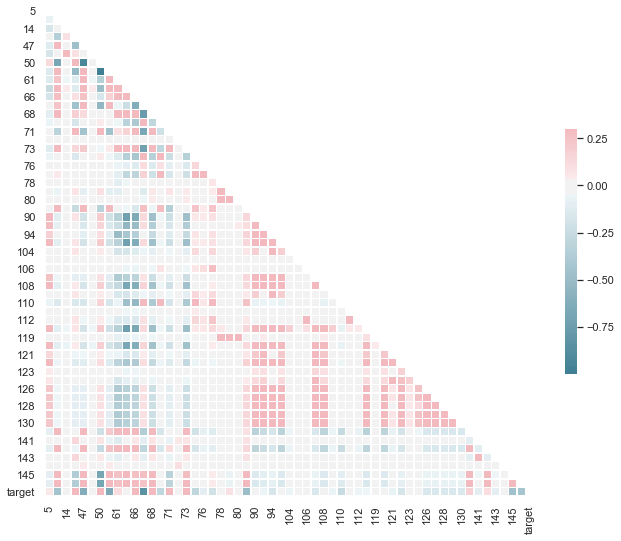

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Pairwise Relationships Matrix

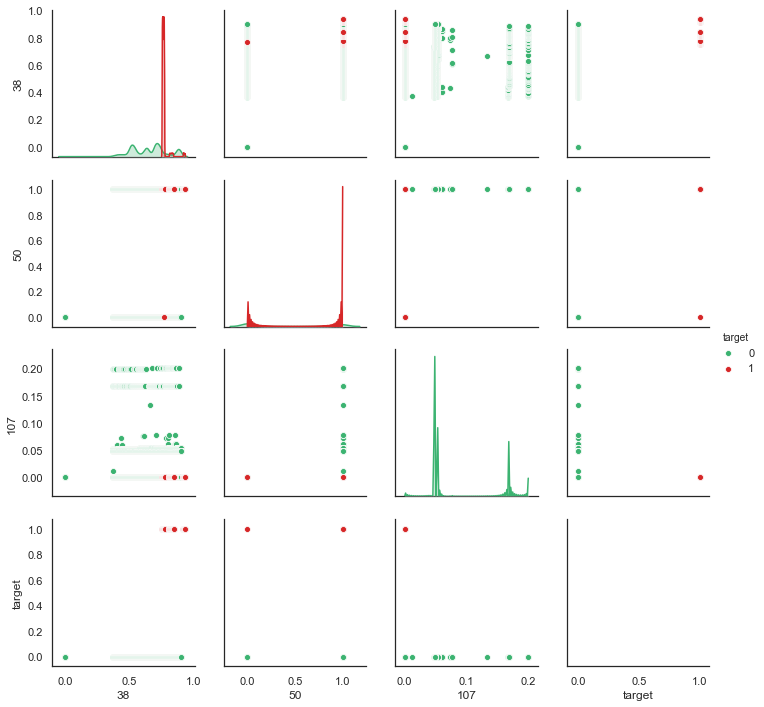

In [15]:
# Pairplot Matrix
colors=['mediumseagreen', 'tab:red']
def pairplot(df):
    sns.pairplot(data=df, hue='target', vars=['38','50','107','target'], palette={0:colors[0], 1:colors[1]})
    plt.show()
    
pairplot(df)

## Boxplot Matrix

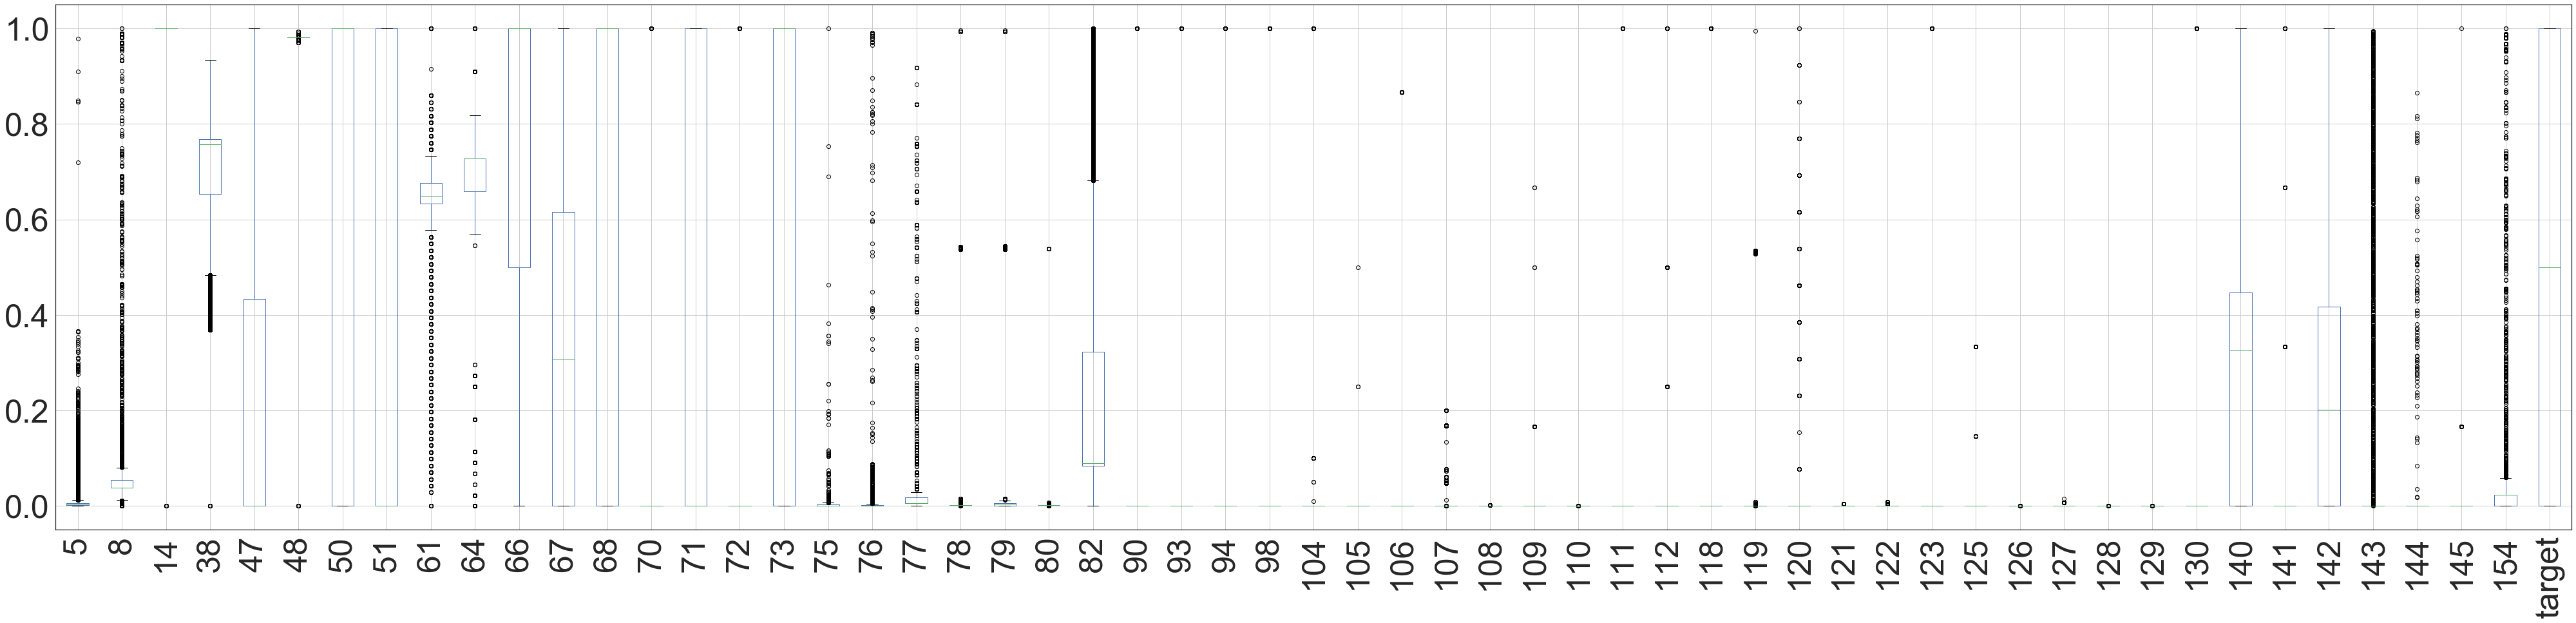

In [16]:
# Boxplot Matrix
def boxplot(df):
    f, ax = plt.subplots(figsize=(70,15)) 
    ax.tick_params(labelsize=50)
    df.boxplot()
    plt.xticks(rotation=90)
    plt.show()
    
boxplot(df)

# Graphical Visualization

## 2-Components PCA Plot for Graphical Visualization

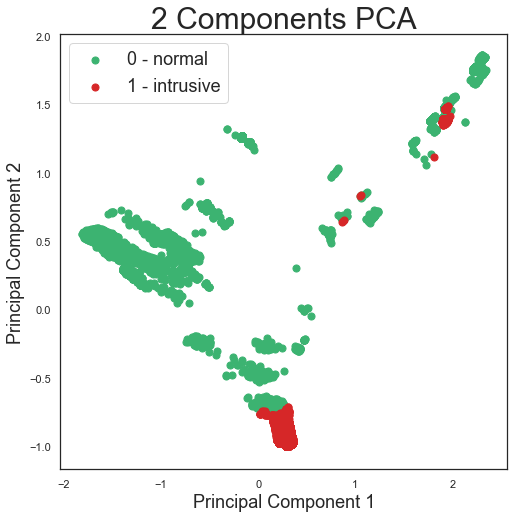

In [17]:
#plot the 2 components PCA to visualize the dataset
def plot_2D_PCA(df):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    df_copy = df.copy()
    del df_copy['target']
    principalComponents = pca.fit_transform(df_copy)
    principalDf = pd.DataFrame(data = principalComponents,
                               columns = ['principal component 1', 'principal component 2'])
    df_pca = pd.concat([principalDf, df[['target']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 18)
    ax.set_ylabel('Principal Component 2', fontsize = 18)
    ax.set_title('2 Components PCA', fontsize = 30) 
    column_els = df_pca['target'].astype('category').cat.categories
    colors = ['mediumseagreen', 'tab:red']
    for c, color in zip(column_els, colors):
        indicesToKeep = df_pca['target'] == c
        ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1'],
                   df_pca.loc[indicesToKeep, 'principal component 2'],
                   c = [color], s = 50)
        ax.legend(['0 - normal','1 - intrusive'], fontsize = 18)
        ax.grid()
        
#plot_2D_PCA(df)
plot_2D_PCA(df_test)

## 3-Components PCA Plot for Graphical Visualization

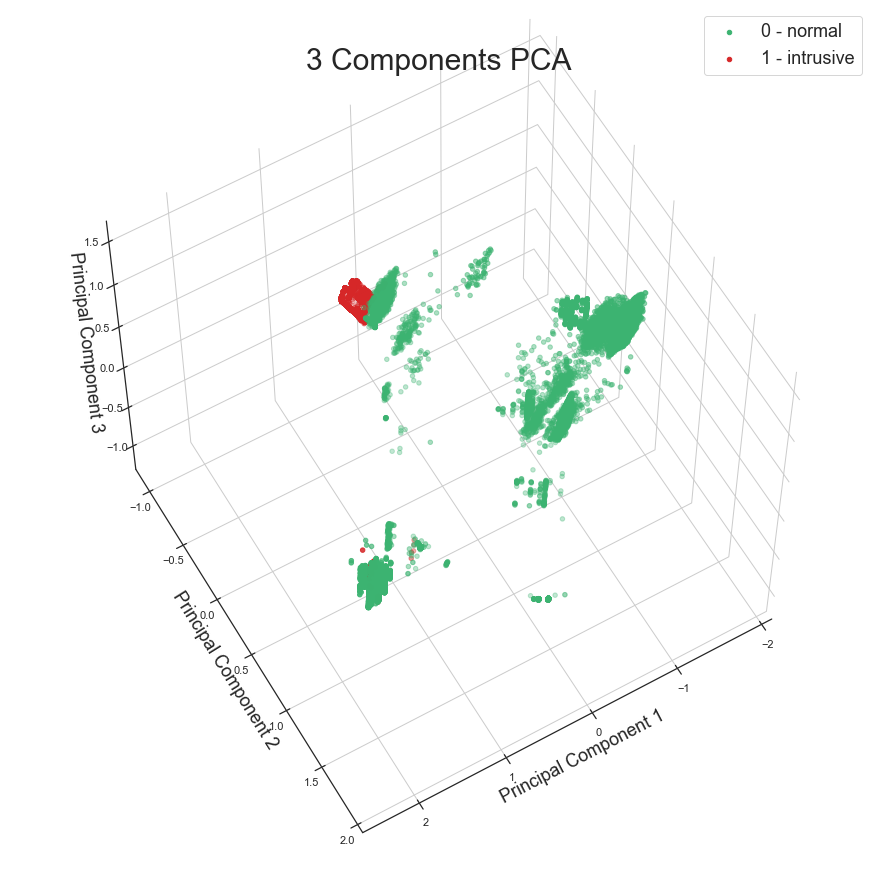

In [18]:
#plot the 3 components PCA to visualize the dataset
def plot_3D_PCA(df, colors=['mediumseagreen', 'tab:red'], bars=['0 - normal','1 - intrusive'], a=60, b=60):
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D
    pca = PCA(n_components=3)
    df_copy = df.copy()
    del df_copy['target']
    principalComponents = pca.fit_transform(df_copy)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                                                     'principal component 2',
                                                                     'principal component 3'])
    df_pca = pd.concat([principalDf, df.astype(float)[['target']]], axis = 1)
    fig = plt.figure(figsize = (12,12))
    ax = Axes3D(fig)
    ax.set_xlabel('Principal Component 1', fontsize = 18)
    ax.set_ylabel('Principal Component 2', fontsize = 18)
    ax.set_zlabel('Principal Component 3', fontsize = 18)
    ax.set_title('3 Components PCA', fontsize = 30)
    column_els = df_pca['target'].astype('category').cat.categories
    for c, color in zip(column_els, colors):
        indicesToKeep = df_pca['target'] == c
        ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1'], 
                    df_pca.loc[indicesToKeep, 'principal component 2'],
                    df_pca.loc[indicesToKeep, 'principal component 3'],
                    c = [color])
        ax.legend(bars, fontsize = 18)
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.grid()
    # rotate the axes and update
    ax.view_init(a, b)

#plot_3D_PCA(df)
plot_3D_PCA(df_test)

## Clustering attempt (not used in the end)

In [19]:
clustering=False
k=2

def df_cluster_target(df, k=k):
    from sklearn.cluster import KMeans
    df_copy = df.copy()
    if len(df_copy.target.unique())==2:
        df_intrusive = df_copy [df_copy['target']==1]
        X_intrusive, Y_intrusive = get_XY(df_intrusive)
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_intrusive)
        df_copy.loc[df_copy['target']==1, 'target'] = kmeans.labels_.astype(float)+1
    return df_copy

if clustering and k==2:
    df_cluster = df_cluster_target(df)
    df_cluster_test = df_cluster_target(df_test)
    v1=sum(df_cluster[df_cluster['target']==1].var())/len(df_cluster[df_cluster['target']==1].var())
    v2=sum(df_cluster[df_cluster['target']==2].var())/len(df_cluster[df_cluster['target']==2].var())
    v1_test=sum(df_cluster_test[df_cluster_test['target']==1].var())/len(df_cluster_test[df_cluster_test['target']==1].var())
    v2_test=sum(df_cluster_test[df_cluster_test['target']==2].var())/len(df_cluster_test[df_cluster_test['target']==2].var())
    if v1>v2 and v1_test<v2_test:
        # invert cluster labels
        df_cluster_test[df_cluster_test['target']==1], df_cluster_test[df_cluster_test['target']==2]= 2, 1
    df = df_cluster
    df_test = df_cluster_test
    plot_3D_PCA(df_cluster, colors=['mediumseagreen', 'tab:red', 'orange', 'blue', 'yellow', 'black'], bars=['0 - normal','1 - intrusive (Cluster1)', '2 - intrusive (Cluster2)', '3 - intrusive (Cluster3)', '4 - intrusive (Cluster4)', '5 - intrusive (Cluster5)'])
    plot_3D_PCA(df_cluster_test, colors=['mediumseagreen', 'tab:red', 'orange', 'blue', 'yellow', 'black'], bars=['0 - normal','1 - intrusive (Cluster1)', '2 - intrusive (Cluster2)', '3 - intrusive (Cluster3)', '4 - intrusive (Cluster4)', '5 - intrusive (Cluster5)'])

## Features Re-Scaling

In [20]:
#raw data AUC=.973 best case on 4 best features Decision Tree
from sklearn.preprocessing import MinMaxScaler
def rescaled(df):
    X,Y = get_XY(df)
    scaler = MinMaxScaler().fit(X) 
    rescaled_X = scaler.transform(X) 
    rescaled_df = pd.DataFrame(data = rescaled_X, columns = df.columns[:len(df.columns)-1])
    rescaled_df = pd.concat([rescaled_df, df.astype(float)[['target']]], axis = 1)
    return rescaled_df
#rescaled_df # AUC=.973 best case on Decision Tree

from sklearn.preprocessing import StandardScaler 
def standardized(df):
    X,Y = get_XY(df)
    scaler = StandardScaler().fit(X) 
    standardized_X = scaler.transform(X) 
    standardized_df = pd.DataFrame(data = standardized_X, columns = df.columns[:len(df.columns)-1])
    standardized_df = pd.concat([standardized_df, df.astype(float)[['target']]], axis = 1)
    return standardized_df
#standardized_df # bad accuracy of Decision Tree Classifier

from sklearn.preprocessing import RobustScaler
def robust_scaled(df):
    X,Y = get_XY(df)
    scaler = RobustScaler().fit(X) 
    robust_X = scaler.transform(X) 
    robust_df = pd.DataFrame(data = robust_X, columns = df.columns[:len(df.columns)-1])
    robust_df = pd.concat([robust_df, df.astype(float)[['target']]], axis = 1)
    return robust_df
#robust_df # AUC=.973 best case on Decision Tree

from sklearn.preprocessing import Normalizer 
def normalized(df):
    X,Y = get_XY(df)
    scaler = Normalizer().fit(X) 
    normalized_X = scaler.transform(X) 
    normalized_df = pd.DataFrame(data = normalized_X, columns = df.columns[:len(df.columns)-1])
    normalized_df = pd.concat([normalized_df, df.astype(float)[['target']]], axis = 1)
    return normalized_df
#normalized_df # good accuracy, reduces interpretability of Decision Tree

from sklearn.preprocessing import Binarizer 
def binarized(df):
    X,Y = get_XY(df)
    scaler = Binarizer().fit(X) 
    binary_X = scaler.transform(X) 
    binary_df = pd.DataFrame(data = binary_X, columns = df.columns[:len(df.columns)-1])
    binary_df = pd.concat([binary_df, df.astype(float)[['target']]], axis = 1)
    return binary_df
#binary_df # slightly lower accuracy, increases interpretability of Decision Tree

## Test Features Re-Scaling and impact on accuracy

In [21]:
# test the effect of rescaling on a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=3, random_state=7)
model = LogisticRegression()

def test_rescaling(df):
    X,Y = get_XY(df)
    results = cross_val_score(model, X, Y, cv=kfold) 
    print("Mean estimated accuracy on raw data \n",results.mean())

    rescaled_X = get_XY(rescaled(df))[0]
    rescaled_results = cross_val_score(model, rescaled_X, Y, cv=kfold) 
    print("Mean estimated accuracy on rescaled data \n", rescaled_results.mean())

    standardized_X = get_XY(standardized(df))[0]
    standardized_results = cross_val_score(model, standardized_X, Y, cv=kfold) 
    print("Mean estimated accuracy on standardized data \n", standardized_results.mean())

    robust_X = get_XY(robust_scaled(df))[0]
    robust_results = cross_val_score(model, robust_X, Y, cv=kfold) 
    print("Mean estimated accuracy on robust data \n", robust_results.mean())

    normalized_X = get_XY(normalized(df))[0]
    normalized_results = cross_val_score(model, normalized_X, Y, cv=kfold) 
    print("Mean estimated accuracy on normalised data \n", normalized_results.mean())

    binarized_X = get_XY(binarized(df))[0]
    binary_results = cross_val_score(model, binarized_X, Y, cv=kfold) 
    print("Mean estimated accuracy on binarised data \n", binary_results.mean())
    
test_rescaling(df_backup.rename(columns={'155': 'target'}))

Mean estimated accuracy on raw data 
 0.9259408103540663
Mean estimated accuracy on rescaled data 
 0.9373686162977619
Mean estimated accuracy on standardized data 
 0.813084786282511
Mean estimated accuracy on robust data 
 0.8674209636865752
Mean estimated accuracy on normalised data 
 0.9299183875355509
Mean estimated accuracy on binarised data 
 0.9840793866699641


# 2a - Features Engineering

## Linear Discriminant Analysis - LDA

## LDA Hyperparameters Tuning

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LinearDiscriminantAnalysis().get_params()

def random_search_parameters(df, df_test, clf_name, params, cv=10):
    X_train, Y_train = get_XY(df)
    X_test, Y_test = get_XY(df_test)
    clf = clf_name()
    clf = clf.fit(X_train, Y_train)
    random_search = RandomizedSearchCV(estimator=clf,param_distributions=params,verbose=0,cv=cv)
    random_search.fit(X_train, Y_train)
    print('train score is: '+str(random_search.score(X_train,Y_train)))
    print('test score is: '+str(random_search.score(X_test,Y_test)))
    return random_search.best_params_

#best_params_random_LDA = random_search_parameters(df, df_test, LinearDiscriminantAnalysis, params)
#print(best_params_random_LDA)

#train score is: 0.978576728082107
#test score is: 0.9634194930026396
tuned_params={'tol': 0.6, 'store_covariance': False, 'solver': 'svd', 'shrinkage': None, 'priors': None, 'n_components': None}

## LDA Feature Construction (default parameters)

In [23]:
lda = True

if lda:
    df=standardized(df)
    df_test=standardized(df_test)
    
    default_params=LinearDiscriminantAnalysis().get_params()

    def lda_only(data=df_test, df_train=df, clustering=clustering, params=default_params):
        X,Y = get_XY(data)
        Y=0
        X_train,Y_train = get_XY(df_train)
        scaler = LinearDiscriminantAnalysis(**params)
        lda_X = scaler.fit(X_train, Y_train) 
        lda_X = scaler.transform(X) 
        cols=['LDA1','LDA2'] if clustering else ['LDA1']
        lda_only_df = pd.DataFrame(data = lda_X, columns = cols)
        lda_only_df = pd.concat([lda_only_df, data.astype(float)[['target']]], axis = 1)
        return lda_only_df

    df_lda_only = lda_only(df)
    df_lda_only_test = lda_only(df_test)
df_lda_only.head()

,LDA1,target
0,-4.935884,0.0
1,-4.356593,0.0
2,-3.989133,0.0
3,-5.442756,0.0
4,-3.743458,0.0


## LDA Feature Construction (tuned parameters)

In [24]:
lda_tuned = True

if lda_tuned:
    df=standardized(df)
    df_test=standardized(df_test)

    def lda_only_tuned(data=df_test, df_train=df, clustering=clustering, params=tuned_params):
        X,Y = get_XY(data)
        Y=0
        X_train,Y_train = get_XY(df_train)
        scaler = LinearDiscriminantAnalysis(**params)
        lda_X = scaler.fit(X_train, Y_train) 
        lda_X = scaler.transform(X) 
        cols=['LDA_tuned1','LDA_tuned2'] if clustering else ['LDA_tuned1']
        lda_only_df = pd.DataFrame(data = lda_X, columns = cols)
        lda_only_df = pd.concat([lda_only_df, data.astype(float)[['target']]], axis = 1)
        return lda_only_df

    df_lda_tuned_only = lda_only_tuned(df)
    df_lda_tuned_only_test = lda_only_tuned(df_test)
df_lda_tuned_only.head()

,LDA_tuned1,target
0,-2.482818,0.0
1,-3.912758,0.0
2,1.779093,0.0
3,-3.754734,0.0
4,-3.474843,0.0


## Principal Component Analysis - PCA for Feature Construction

In [25]:
from sklearn.decomposition import PCA
def pca_only(df, k=3):
    pca = PCA(n_components=k)
    df_copy = df.copy()
    del df_copy['target']
    principalComponents = pca.fit_transform(df_copy)
    print(pca.explained_variance_)
    cols=[]
    for i in range(k): cols.append('PC'+str(i+1))
    principalDf = pd.DataFrame(data = principalComponents, columns = cols)
    df_pca_only = pd.concat([principalDf, df.astype(float)[['target']]], axis = 1)
    return df_pca_only
df_pca_only = pca_only(df)
df_pca_only_test = pca_only(df_test)
df_pca_only.head()

[12.23859793  6.34478456  5.05057346]
[14.21623872  7.39955625  4.34474617]


,PC1,PC2,PC3,target
0,-0.848258,1.672843,1.340299,0.0
1,0.079434,1.227075,2.657860,0.0
2,9.257750,1.314846,0.405963,0.0
3,18.527931,5.757209,-6.973706,0.0
4,10.216564,1.691956,0.074565,0.0


## t-SNE for Feature Construction attempt (not used in the end)

In [26]:
tsne = False

if tsne:
    from sklearn.manifold import TSNE
    def tsne_only(df, k=1):
        tsne = TSNE(n_components=k)
        df_copy = df.copy()
        del df_copy['target']
        principalComponents = tsne.fit_transform(df_copy)
        cols=[]
        for i in range(k): cols.append('TSNE'+str(i+1))
        principalDf = pd.DataFrame(data = principalComponents, columns = cols)
        df_tsne_only = pd.concat([principalDf, df.astype(float)[['target']]], axis = 1)
        return df_tsne_only
    df_tsne_only = tsne_only(df)
    df_tsne_only_test = tsne_only(df_test)
    df_tsne_only.head()

## Factor Analysis - FA for Feature Construction

In [27]:
from sklearn.decomposition import FactorAnalysis
def fa_only(df, k=3):
    X,Y = get_XY(df)
    scaler = FactorAnalysis(n_components=k)
    fa_X = scaler.fit(X)
    fa_X = scaler.transform(X) 
    cols=[]
    for i in range(k): cols.append('FA'+str(i+1))
    fa_only_df = pd.DataFrame(data = fa_X, columns = cols)
    fa_only_df = pd.concat([fa_only_df, df.astype(float)[['target']]], axis = 1)
    return fa_only_df

df_fa_only = fa_only(df)
df_fa_only_test = fa_only(df_test)
df_fa_only.head()

,FA1,FA2,FA3,target
0,-0.148360,1.527342,0.247204,0.0
1,-0.148360,1.510956,-1.101912,0.0
2,-0.148360,-0.695429,-2.184973,0.0
3,6.740366,0.000136,-0.009882,0.0
4,-0.148360,-0.695554,-2.191656,0.0


## Autoencoder - AE for Feature Construction

In [28]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

n_epochs=10

X_train, Y_train = get_XY(df)
X_test, Y_test = get_XY(df_test)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

n=df.shape[1]-1
input_img= Input(shape=(n,))
encoded = Dense(units=n//2//2, activation='relu')(input_img)
encoded = Dense(units=n//2//2//2, activation='relu')(encoded)
encoded = Dense(units=n//2//2//2//2, activation='relu')(encoded)
decoded = Dense(units=n//2//2//2, activation='relu')(encoded)
decoded = Dense(units=n//2//2, activation='relu')(decoded)
decoded = Dense(units=n, activation='sigmoid')(decoded)

autoencoder=Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.summary()
encoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train, X_train,
                epochs=n_epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

df_encoded_only = pd.DataFrame(encoder.predict(X_train))
df_encoded_only_test = pd.DataFrame(encoder.predict(X_test))

df_decoded_only = pd.DataFrame(autoencoder.predict(X_train))
df_decoded_only_test = pd.DataFrame(autoencoder.predict(X_test))

(97044, 56)
(40158, 56)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                798       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_6 (Dense)              (None, 56)          

## Plot original images, encoded images, reconstructed images

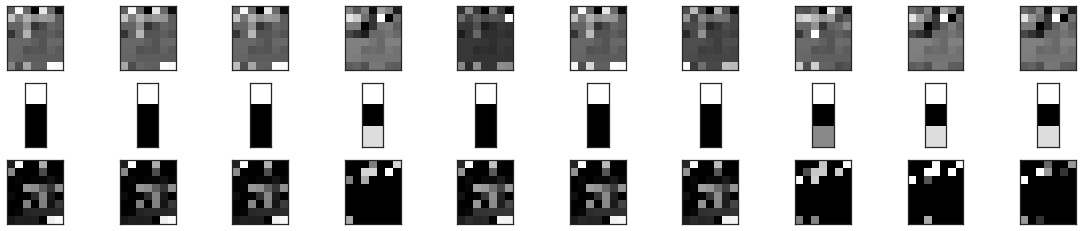

In [29]:
cmap='gray'
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(8, 7), cmap=plt.get_cmap(cmap))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(3,1), cmap=plt.get_cmap(cmap))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(8, 7), cmap=plt.get_cmap(cmap))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Get Encoded Features

In [30]:
cols={}
for name in df_encoded_only.columns:
    cols[name]='ENC'+str(name+1)

df_encoded_only=df_encoded_only.rename(columns = cols)
df_encoded_only_test=df_encoded_only_test.rename(columns = cols)

df_encoded_only = pd.concat([df_encoded_only, df.astype(float)[['target']]], axis = 1)
df_encoded_only_test = pd.concat([df_encoded_only_test, df_test.astype(float)[['target']]], axis = 1)

df_encoded_only.head()

,ENC1,ENC2,ENC3,target
0,6.137648,-0.0,4.097391,0.0
1,8.096388,-0.0,7.023800,0.0
2,2.821573,-0.0,-0.000000,0.0
3,2.505712,-0.0,-0.000000,0.0
4,2.644388,-0.0,-0.000000,0.0


## Get Reconstructed Features (not used in the end)

In [31]:
cols={}
for name in df_decoded_only.columns:
    cols[name]='DEC'+str(name+1)

df_decoded_only=df_decoded_only.rename(columns = cols)
df_decoded_only_test=df_decoded_only_test.rename(columns = cols)

df_decoded_only = pd.concat([df_decoded_only.astype(float), df.astype(float)[['target']]], axis = 1)
df_decoded_only_test = pd.concat([df_decoded_only_test.astype(float), df_test.astype(float)[['target']]], axis = 1)

df_decoded_only.head()

,DEC1,DEC2,DEC3,DEC4,DEC5,DEC6,DEC7,DEC8,DEC9,DEC10,DEC11,DEC12,DEC13,DEC14,DEC15,DEC16,DEC17,DEC18,DEC19,DEC20,DEC21,DEC22,DEC23,DEC24,DEC25,DEC26,DEC27,DEC28,DEC29,DEC30,DEC31,DEC32,DEC33,DEC34,DEC35,DEC36,DEC37,DEC38,DEC39,DEC40,DEC41,DEC42,DEC43,DEC44,DEC45,DEC46,DEC47,DEC48,DEC49,DEC50,DEC51,DEC52,DEC53,DEC54,DEC55,DEC56,target
0,0.000000,0.000000,0.000000,1.239777e-05,0.000000,0.000000,1.406670e-05,0.000000,3.725290e-06,1.281500e-05,1.141429e-05,0.000000,1.016259e-05,0.000000e+00,1.427531e-05,0.000000,1.055002e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,5.960464e-08,0.000000,0.000000,5.960464e-08,0.000000,5.960464e-08,1.490116e-07,8.940697e-08,0.000000,1.192093e-07,0.000000e+00,8.940697e-08,0.000000,2.980232e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000795,0.005201,0.000040,5.960464e-08,0.003854,0.000037,2.980232e-08,0.003014,1.654029e-05,1.698732e-06,0.000000e+00,0.001782,2.026558e-06,3.278255e-07,0.000000e+00,0.000207,1.341105e-06,0.000190,0.000195,0.000567,0.000147,0.000010,0.000104,0.003256,0.003061,0.002233,0.001333,0.003041,0.000365,0.000016,0.000112,0.001132,0.002867,0.000695,0.0,0.000033,0.000002,0.002995,0.000066,0.002794,0.000586,0.001451,0.000061,0.000169,0.000989,0.001040,0.001061,0.001022,0.001055,0.000598,0.000881,0.000767,0.000822,0.000101,0.004975,0.004986,0.0
3,0.001533,0.008392,0.000100,0.000000e+00,0.006585,0.000091,5.960464e-08,0.005134,4.133582e-05,5.185604e-06,0.000000e+00,0.003170,6.258488e-06,1.281500e-06,0.000000e+00,0.000457,4.380941e-06,0.000419,0.000423,0.001169,0.000333,0.000028,0.000245,0.005499,0.005170,0.003993,0.002497,0.005092,0.000773,0.000043,0.000259,0.002086,0.004829,0.001317,0.0,0.000079,0.000007,0.005266,0.000159,0.004708,0.001182,0.002671,0.000151,0.000377,0.001952,0.001981,0.001979,0.001978,0.001983,0.001139,0.001753,0.001456,0.001570,0.000233,0.008138,0.007934,0.0
4,0.001149,0.006804,0.000067,0.000000e+00,0.005206,0.000061,2.980232e-08,0.004064,2.759695e-05,3.188848e-06,0.000000e+00,0.002462,3.844500e-06,7.152557e-07,0.000000e+00,0.000322,2.622604e-06,0.000296,0.000301,0.000851,0.000232,0.000018,0.000168,0.004369,0.004108,0.003094,0.001896,0.004061,0.000556,0.000028,0.000180,0.001595,0.003841,0.000995,0.0,0.000054,0.000004,0.004111,0.000108,0.003744,0.000869,0.002043,0.000102,0.000265,0.001448,0.001493,0.001505,0.001480,0.001503,0.000859,0.001296,0.001099,0.001181,0.000161,0.006558,0.006471,0.0


## Adding all of the Engineered Features to the dataset

In [32]:
def add_components(df, df_constructed):
    df_copy = df.copy()
    del df_copy['target']
    df_constructed = pd.concat([df_copy, df_constructed], axis = 1)
    return df_constructed

try:
    df = add_components(df, df_pca_only)
    df_test = add_components(df_test, df_pca_only_test)
except: pass
try:
    df = add_components(df, df_tsne_only)
    df_test = add_components(df_test, df_tsne_only_test)
except: pass
try:
    df = add_components(df, df_fa_only)
    df_test = add_components(df_test, df_fa_only_test)
except: pass
try:
    df = add_components(df, df_lda_only)
    df_test = add_components(df_test, df_lda_only_test)
except: pass
try:
    df = add_components(df, df_lda_tuned_only)
    df_test = add_components(df_test, df_lda_tuned_only_test)
except: pass
try:
    df = add_components(df, df_qda_only)
    df_test = add_components(df_test, df_qda_only_test)
except: pass
try:
    df = add_components(df, df_encoded_only)
    df_test = add_components(df_test, df_encoded_only_test)
except: pass
decoded=False
if decoded:
    try:
        df = add_components(df, df_decoded_only)
        df_test = add_components(df_test, df_decoded_only_test)
    except: pass

print(df.shape)
print(df_test.shape)

(97044, 68)
(40158, 68)


In [33]:
df.head()

,5,8,14,38,47,48,50,51,61,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,154,PC1,PC2,PC3,FA1,FA2,FA3,LDA1,LDA_tuned1,ENC1,ENC2,ENC3,target
0,-0.398089,-0.521063,0.014712,-3.142811,1.568772,0.01475,-1.533249,1.534041,0.708991,0.640755,0.594472,-0.175252,-0.412052,-0.285459,1.391247,-0.032117,-1.542391,0.020304,-0.103169,-0.162696,-0.035523,-0.138420,0.030155,2.653966,-0.308374,-0.237001,-0.169942,-0.306145,-0.058778,-0.005242,-0.029434,-0.150600,-0.293653,-0.060598,-0.256507,-0.021298,-0.069333,-0.314605,-0.029160,-0.295383,-0.068407,-0.182614,-0.024873,-0.038843,-0.148360,-0.148324,-0.147055,-0.148360,-0.148360,-1.050047,-0.104006,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,-0.848258,1.672843,1.340299,-0.148360,1.527342,0.247204,-4.935884,-2.482818,6.137648,-0.0,4.097391,0.0
1,-0.401396,-0.546879,0.014712,-3.142628,0.451584,0.01475,-1.533249,1.534041,0.708991,-0.081367,-0.742925,1.575793,-1.523053,-0.285459,-0.718780,-0.032117,-1.542391,-0.329739,-0.049529,-0.320552,-0.116345,-0.218941,-0.226305,-0.831461,-0.308374,-0.237001,-0.169942,-0.306145,-0.058778,-0.005242,-0.029434,-0.150600,-0.293653,-0.060598,-0.256507,-0.021298,-0.069333,-0.314605,-0.029160,-0.295383,-0.068407,-0.182614,-0.024873,-0.038843,-0.148360,-0.148324,-0.147055,-0.148360,-0.148360,-1.050047,-0.104006,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,0.079434,1.227075,2.657860,-0.148360,1.510956,-1.101912,-4.356593,-3.912758,8.096388,-0.0,7.023800,0.0
2,1.883791,-0.347726,0.014712,-3.142264,-0.619051,0.01475,0.652210,-0.651873,-0.254672,-2.247733,-2.080321,0.602982,-1.523053,-0.285459,-0.718780,-0.032117,-1.542391,-0.329739,-0.129992,-0.241625,-0.019360,-0.122317,0.030155,0.109363,3.242814,4.219400,-0.169942,3.266428,-0.058778,-0.005242,-0.029434,2.906133,3.405374,-0.060598,-0.256507,-0.021298,-0.069333,3.178590,0.097512,3.366956,-0.068407,7.769600,-0.024873,-0.038843,-0.148360,-0.148324,-0.147055,-0.148360,-0.148360,-1.050047,-0.104006,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,9.257750,1.314846,0.405963,-0.148360,-0.695429,-2.184973,-3.989133,1.779093,2.821573,-0.0,-0.000000,0.0
3,-0.072373,-0.279498,0.014712,-3.141809,-0.619051,0.01475,0.652210,-0.651873,-4.109153,-2.247733,-2.080321,0.602982,-1.523053,-0.285459,-0.718780,-0.032117,-1.542391,-0.329739,-0.129992,-0.241625,-0.067852,-0.170628,-0.072431,-0.563420,3.242814,4.219400,5.884348,3.266428,-0.058778,-0.005242,-0.029434,10.555249,3.405374,-0.060598,-0.256507,-0.021298,-0.069333,3.178590,0.046843,3.366956,-0.068407,3.793543,-0.024873,-0.038843,6.740366,6.735428,6.929124,6.740366,6.740366,-1.050047,-0.104006,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,18.527931,5.757209,-6.973706,6.740366,0.000136,-0.009882,-5.442756,-3.754734,2.505712,-0.0,-0.000000,0.0
4,1.857280,-0.347726,0.014712,-3.141445,-0.619051,0.01475,0.652210,-0.651873,-0.013756,-2.247733,-2.080321,0.602982,-1.523053,-0.285459,-0.718780,-0.032117,-1.542391,-0.329739,-0.129992,-0.241625,-0.019360,-0.122317,0.030155,0.114777,3.242814,4.219400,-0.169942,3.266428,-0.058778,-0.005242,-0.029434,2.906197,3.405374,-0.060598,-0.256507,-0.021298,-0.069333,3.178590,0.097512,3.366956,14.618451,7.769600,-0.024873,-0.038843,-0.148360,-0.148324,-0.147055,-0.148360,-0.148360,-1.050047,-0.104006,-0.995985,-0.091603,-0.02603,-0.453058,-0.495656,10.216564,1.691956,0.074565,-0.148360,-0.695554,-2.191656,-3.743458,-3.474843,2.644388,-0.0,-0.000000,0.0


In [34]:
df_test.head()

,5,8,14,38,47,48,50,51,61,64,66,67,68,70,71,72,73,75,76,77,78,79,80,82,90,93,94,98,104,105,106,107,108,109,110,111,112,118,119,120,121,122,123,125,126,127,128,129,130,140,141,142,143,144,145,154,PC1,PC2,PC3,FA1,FA2,FA3,LDA1,LDA_tuned1,ENC1,ENC2,ENC3,target
0,-0.156475,2.120297,0.017289,-1.541765,1.858587,0.017139,-1.337731,1.338601,0.286151,1.058834,0.526873,0.708971,0.638029,-0.190057,-0.049964,-0.059147,0.576833,-0.763338,-0.424158,-0.051625,-0.167511,-0.760351,-0.122997,1.103498,-0.319044,-0.298083,-0.173232,-0.316288,-0.007392,-0.00499,-0.00499,-0.152594,-0.318759,-0.007289,-0.010107,-0.014972,-0.017736,-0.324416,-0.267097,-0.322009,-0.08514,-0.211862,-0.036008,-0.066565,-0.180053,-0.180053,-0.177518,-0.180053,-0.180053,0.401289,-0.396351,0.906263,-0.11841,-0.136731,2.218202,2.123493,-2.161221,-4.554710,1.297571,-0.180053,-1.306997,0.235563,-4.416364,-2.784352,3.308079,-0.0,-0.000000,0.0
1,-0.110198,2.120297,0.017289,-1.541516,1.858587,0.017139,-1.337731,1.338601,0.286151,1.058834,0.526873,0.708971,0.638029,-0.190057,-0.049964,-0.059147,0.576833,-0.763338,-0.424158,-0.051625,-0.167511,-0.760351,-0.122997,1.137736,-0.319044,-0.298083,-0.173232,-0.316288,-0.007392,-0.00499,-0.00499,-0.152594,-0.318759,-0.007289,-0.010107,-0.014972,-0.017736,-0.324416,-0.267097,-0.322009,-0.08514,-0.211862,-0.036008,-0.066565,-0.180053,-0.180053,-0.177518,-0.180053,-0.180053,0.917571,-0.396351,-0.035457,-0.11841,-0.136731,2.218202,2.123493,-2.116875,-4.576454,1.225271,-0.180053,-1.307028,0.235660,-4.245552,-2.867581,3.325836,-0.0,-0.000000,0.0
2,-0.110914,2.120297,0.017289,-1.541516,1.858587,0.017139,-1.337731,1.338601,0.149027,1.058834,0.526873,0.708971,0.638029,-0.190057,-0.049964,-0.059147,0.576833,-0.763338,-0.424158,-0.051625,-0.167511,-0.760351,-0.122997,1.160548,-0.319044,-0.298083,-0.173232,-0.316288,-0.007392,-0.00499,-0.00499,-0.152594,-0.318759,-0.007289,-0.010107,-0.014972,-0.017736,-0.324416,-0.267097,-0.322009,-0.08514,-0.211862,-0.036008,-0.066565,-0.180053,-0.180053,-0.177518,-0.180053,-0.180053,1.261758,-0.396351,0.900202,-0.11841,-0.136731,2.218202,2.123493,-2.189819,-4.775704,1.425605,-0.180053,-1.307187,0.235650,-4.347114,-2.789839,3.167980,-0.0,-0.000000,0.0
3,0.053202,-0.540138,0.017289,-1.541516,0.421070,0.017139,-1.337731,1.338601,0.971769,-0.236787,-1.024767,1.705671,-1.693572,-0.190057,-0.049964,-0.059147,-1.733605,-1.047066,-0.140002,-0.063102,-0.464339,-0.760751,-1.020851,-1.349837,-0.319044,-0.298083,-0.173232,-0.316288,-0.007392,-0.00499,-0.00499,-0.152594,-0.318759,-0.007289,-0.010107,-0.014972,-0.017736,-0.324416,-0.267097,-0.322009,-0.08514,-0.211862,-0.036008,-0.066565,-0.180053,-0.180053,-0.177518,-0.180053,-0.180053,-0.488417,-0.396351,-0.632344,-0.11841,-0.136731,-0.448102,-0.490063,-0.062718,-1.881150,-3.678644,-0.180053,-1.301883,0.243283,-4.016150,-2.968685,8.140401,-0.0,7.049688,0.0
4,-0.219965,2.120297,0.017289,-1.541516,1.858587,0.017139,-1.337731,1.338601,0.286151,1.058834,0.526873,0.708971,0.638029,5.261586,-0.049964,-0.059147,0.576833,-0.763338,-0.424158,-0.051625,-0.167511,-0.760351,-0.122997,1.213478,-0.319044,-0.298083,-0.173232,-0.316288,-0.007392,-0.00499,-0.00499,-0.152594,-0.318759,-0.007289,-0.010107,-0.014972,-0.017736,-0.324416,-0.267097,-0.322009,-0.08514,-0.211862,-0.036008,-0.066565,-0.180053,-0.180053,-0.177518,-0.180053,-0.180053,2.059590,-0.396351,2.267989,-0.11841,-0.136731,2.218202,2.123493,-2.405501,-5.628056,1.986314,-0.180053,-1.307804,0.235965,-5.379655,-3.825162,2.728964,-0.0,-0.000000,0.0


## Re-Scaling before feature selection

In [35]:
rescale = True

# choose scale among rescaled, standardized, robust_scaled, normalized, binarized
scaled = standardized

if rescale:
    df = scaled(df)
    df_test = scaled(df_test)

# 2b - Selecting Features

In [36]:
#number of features to select
#we tested several different values of k and decided that k=5 is the best
k=5

## 2.1 Chi-Squared Test

[6.100e+02 1.647e+04 4.545e-03 1.460e+04 2.842e+04 1.651e-02 1.232e+04
 2.894e+04 2.247e+03 6.031e+03 6.031e+03 3.448e+04 1.014e+04 7.308e+03
 3.212e+04 8.464e+01 6.540e+03 2.879e+04 7.814e+03 9.185e+03 1.971e+03
 3.383e+04 4.151e+03 2.359e+04 1.015e+02 2.703e+02 2.668e+03 7.968e+01
 3.450e+02 3.000e+00 8.005e+01 3.131e+03 6.867e+00 3.241e+02 6.002e+03
 3.273e+00 3.752e+02 1.577e+02 5.366e+01 1.531e+01 4.520e+02 3.514e+03
 6.000e+01 1.490e+02 2.090e+03 2.090e+03 2.090e+03 2.090e+03 2.090e+03
 6.463e+03 1.075e+03 1.656e+03 1.064e+03 8.000e+01 1.655e+04 1.645e+04
 1.500e+04 3.255e+04 2.474e+04 2.090e+03 3.006e+04 5.493e+03 4.437e+04
 4.282e+04 2.284e+04       nan 2.426e+04]
[[0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]]
indices of selected features are: [65 62 63 11 21]


,ENC2,LDA1,LDA_tuned1,67,79,target
count,97044.0,9.704400e+04,9.704400e+04,9.704400e+04,9.704400e+04,97044.000000
mean,0.0,-3.438426e-15,-2.890222e-15,-2.743171e-13,4.734959e-14,0.500000
std,0.0,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.500003
min,-0.0,-5.541096e+00,-3.977334e+00,-9.534859e-01,-2.189413e-01,0.000000
25%,-0.0,-1.030234e+00,-1.029637e+00,-9.534859e-01,-1.545230e-01,0.000000
50%,-0.0,6.701211e-01,3.683761e-01,-1.752521e-01,2.262308e-02,0.500000
75%,-0.0,1.016732e+00,1.027394e+00,6.029816e-01,8.704135e-02,1.000000
max,-0.0,1.325024e+00,2.255557e+00,1.575793e+00,5.545330e+01,1.000000


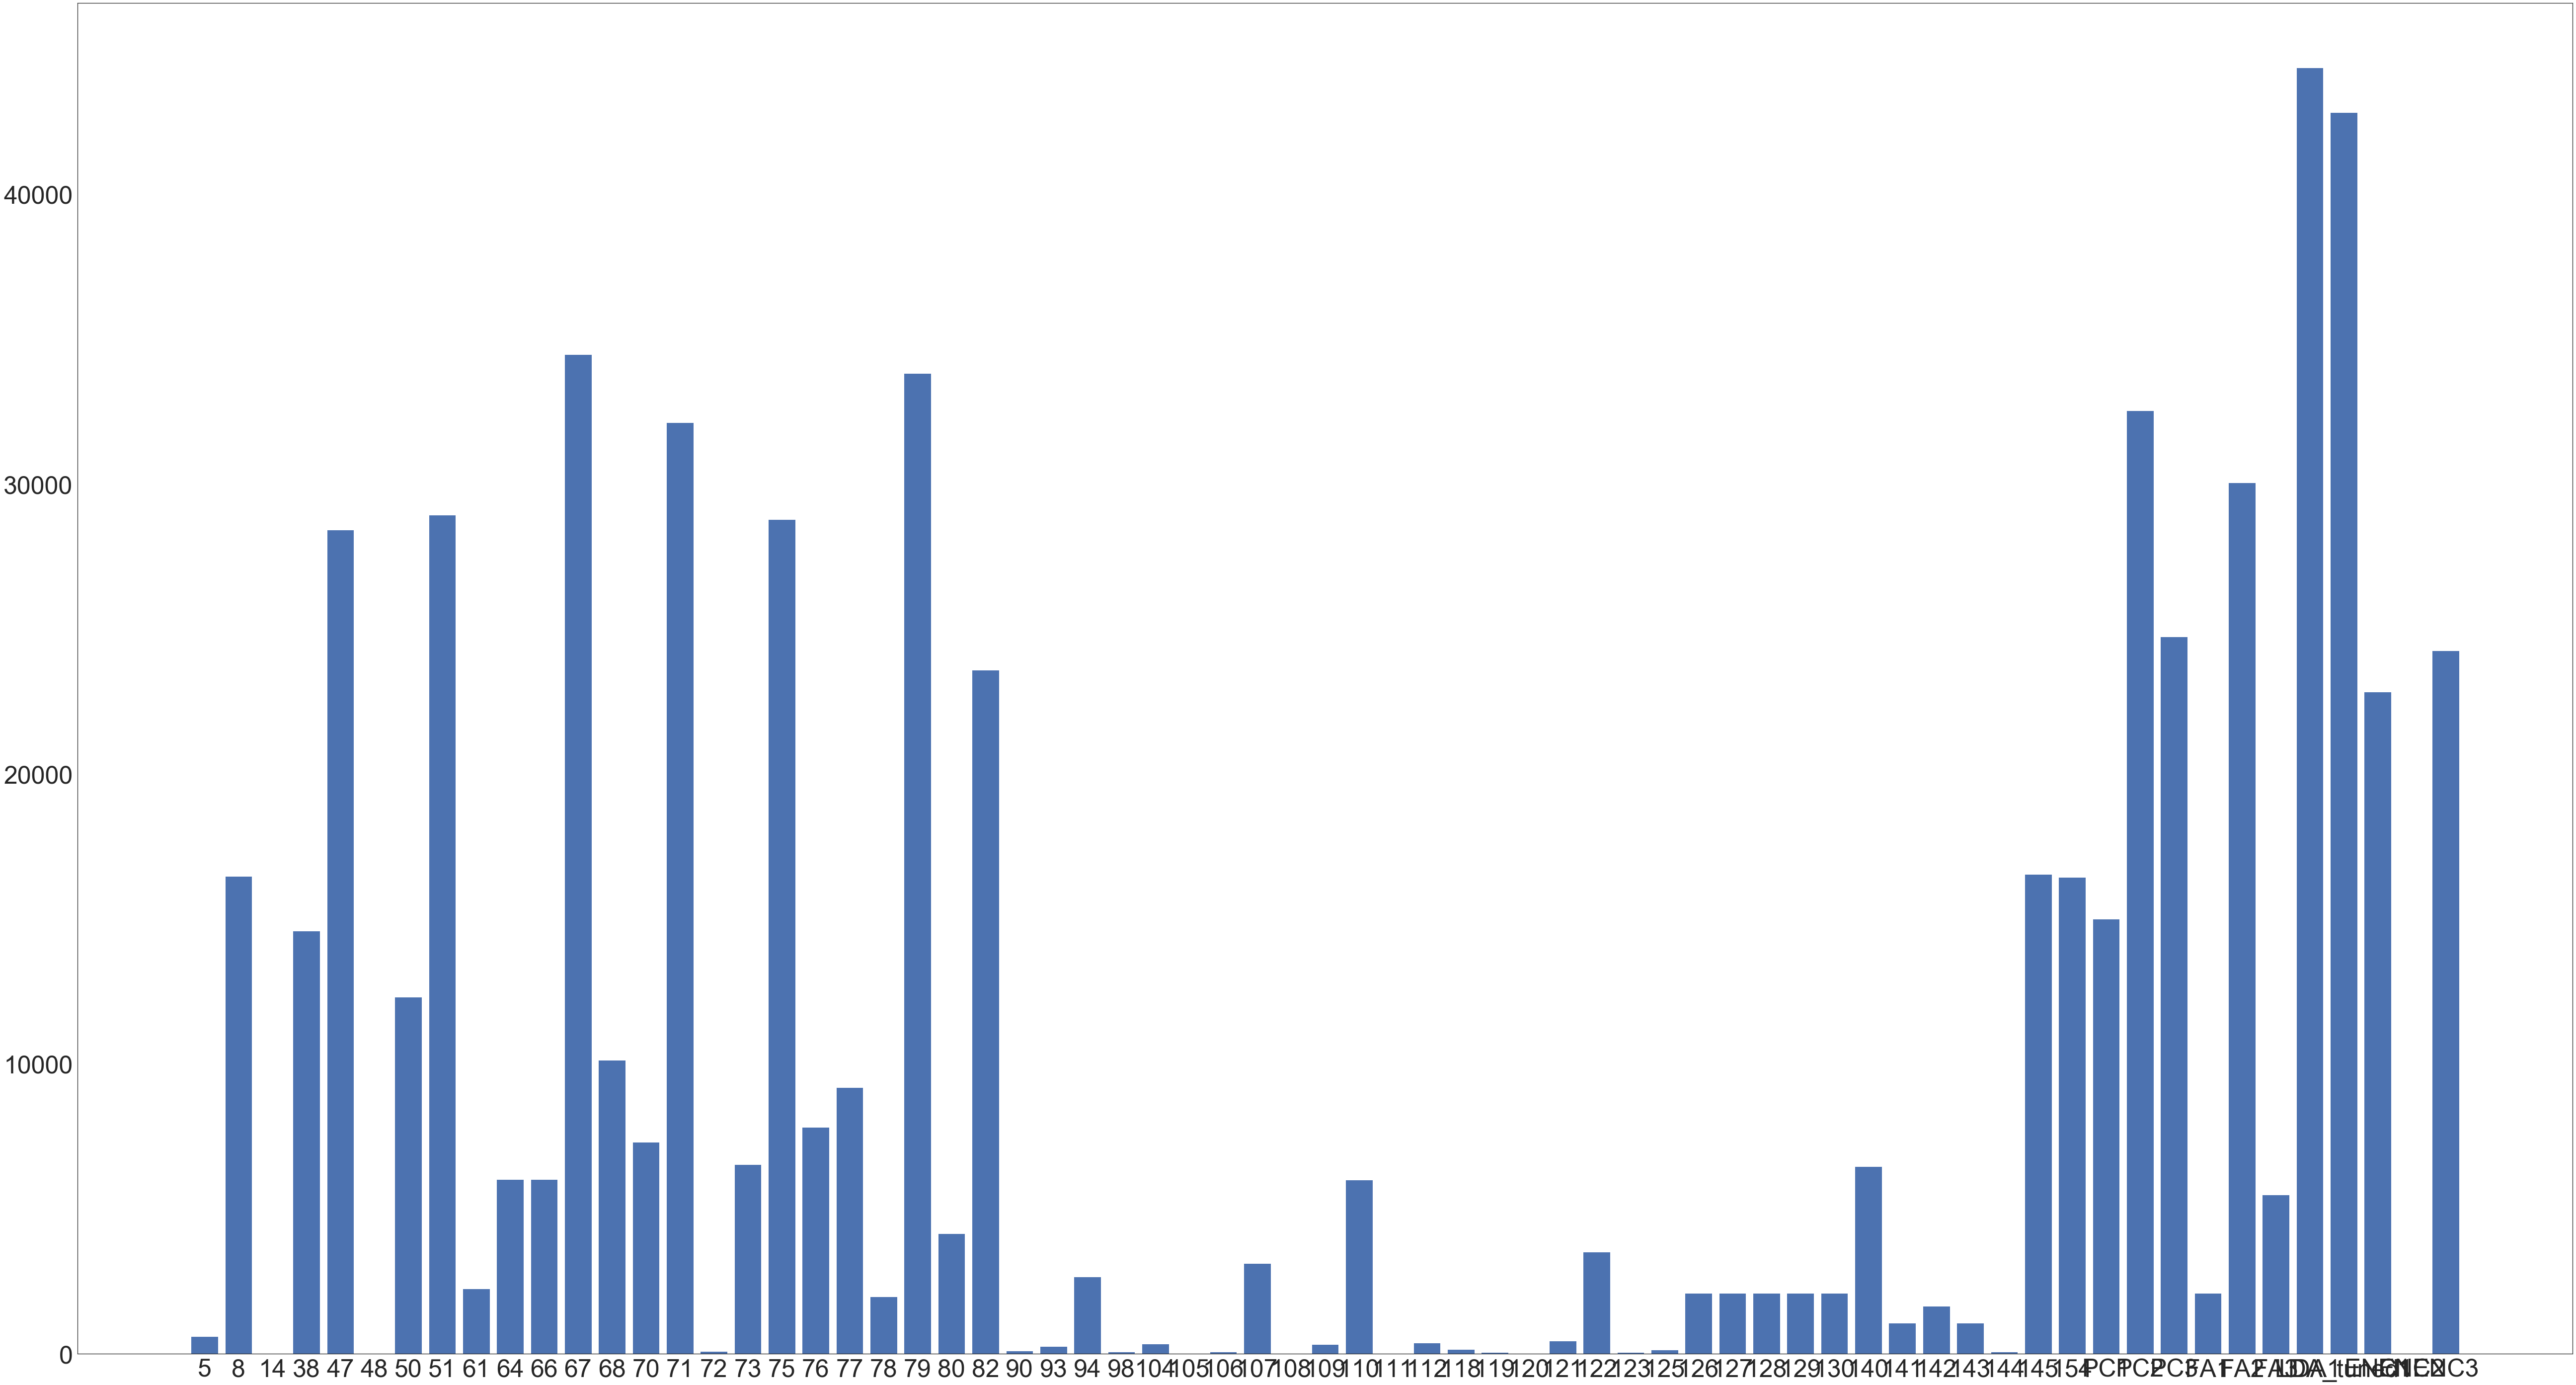

In [37]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

# Correlation Matrix
def correlations(df):
    correlations = df.corr()
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1) 
    fig.colorbar(cax)
    ticks = np.arange(0,5,1) 
    ax.set_xticks(ticks) 
    ax.set_yticks(ticks) 
    l = df.columns
    ax.set_xticklabels(labels=l) 
    ax.set_yticklabels(labels=l) 
    plt.show()

def chi2_feature_selection(df, k=k):
    %matplotlib inline
    # set the number of features to select
    # feature extraction
    test = SelectKBest(score_func=chi2, k=k)
    X, Y = get_XY(binarized(df))
    fit = test.fit(X, Y)
    # summarize scores
    set_printoptions(precision=3)
    print(fit.scores_)
    features = fit.transform(X)
    # summarize selected features
    print(features[0:5,:])

    f, ax = plt.subplots(figsize=(90,50)) 
    ax.tick_params(labelsize=50)
    plt.bar(list(df.columns)[:len(fit.scores_)], fit.scores_)

    indices_max = np.array(fit.scores_).argsort()[-k:][::-1]
    print("indices of selected features are:", indices_max)
    top_names = []
    for i in indices_max:
        top_names.append(list(df.columns)[i])
    chi2_df = df[top_names]

    chi2_df = pd.concat([chi2_df, df[['target']]], axis = 1)

    chi2_df_test = df_test[top_names]
    chi2_df_test = pd.concat([chi2_df_test, df_test[['target']]], axis = 1)
    
    return chi2_df, chi2_df_test

chi2_df, chi2_df_test = chi2_feature_selection(df)
#correlations(chi2_df)
chi2_df.describe()

## 2.2 Feature Extraction with RFE

Feature Ranking: [41 22 38  1 35 53 10 17 32 34 33 18 11  2  5 46 12 42 26 57 29 43 37  7
 13 20  9  8  6 58 44  1 19 49 59 45 16 14 36 27 61  4 62 56 48 47 55 51
 52 30 21 23 60 50 40  1 15 31 25 54  3 39  1 24 28 63  1]


,38,107,154,LDA1,ENC3,target
0,-3.142811,-0.150600,-0.495656,-1.176237,0.712729,0.0
1,-3.142628,-0.150600,-0.495656,-1.038190,1.909490,0.0
2,-3.142264,2.906133,-0.495656,-0.950624,-0.962908,0.0
3,-3.141809,10.555249,-0.495656,-1.297027,-0.962908,0.0
4,-3.141445,2.906197,-0.495656,-0.892078,-0.962908,0.0


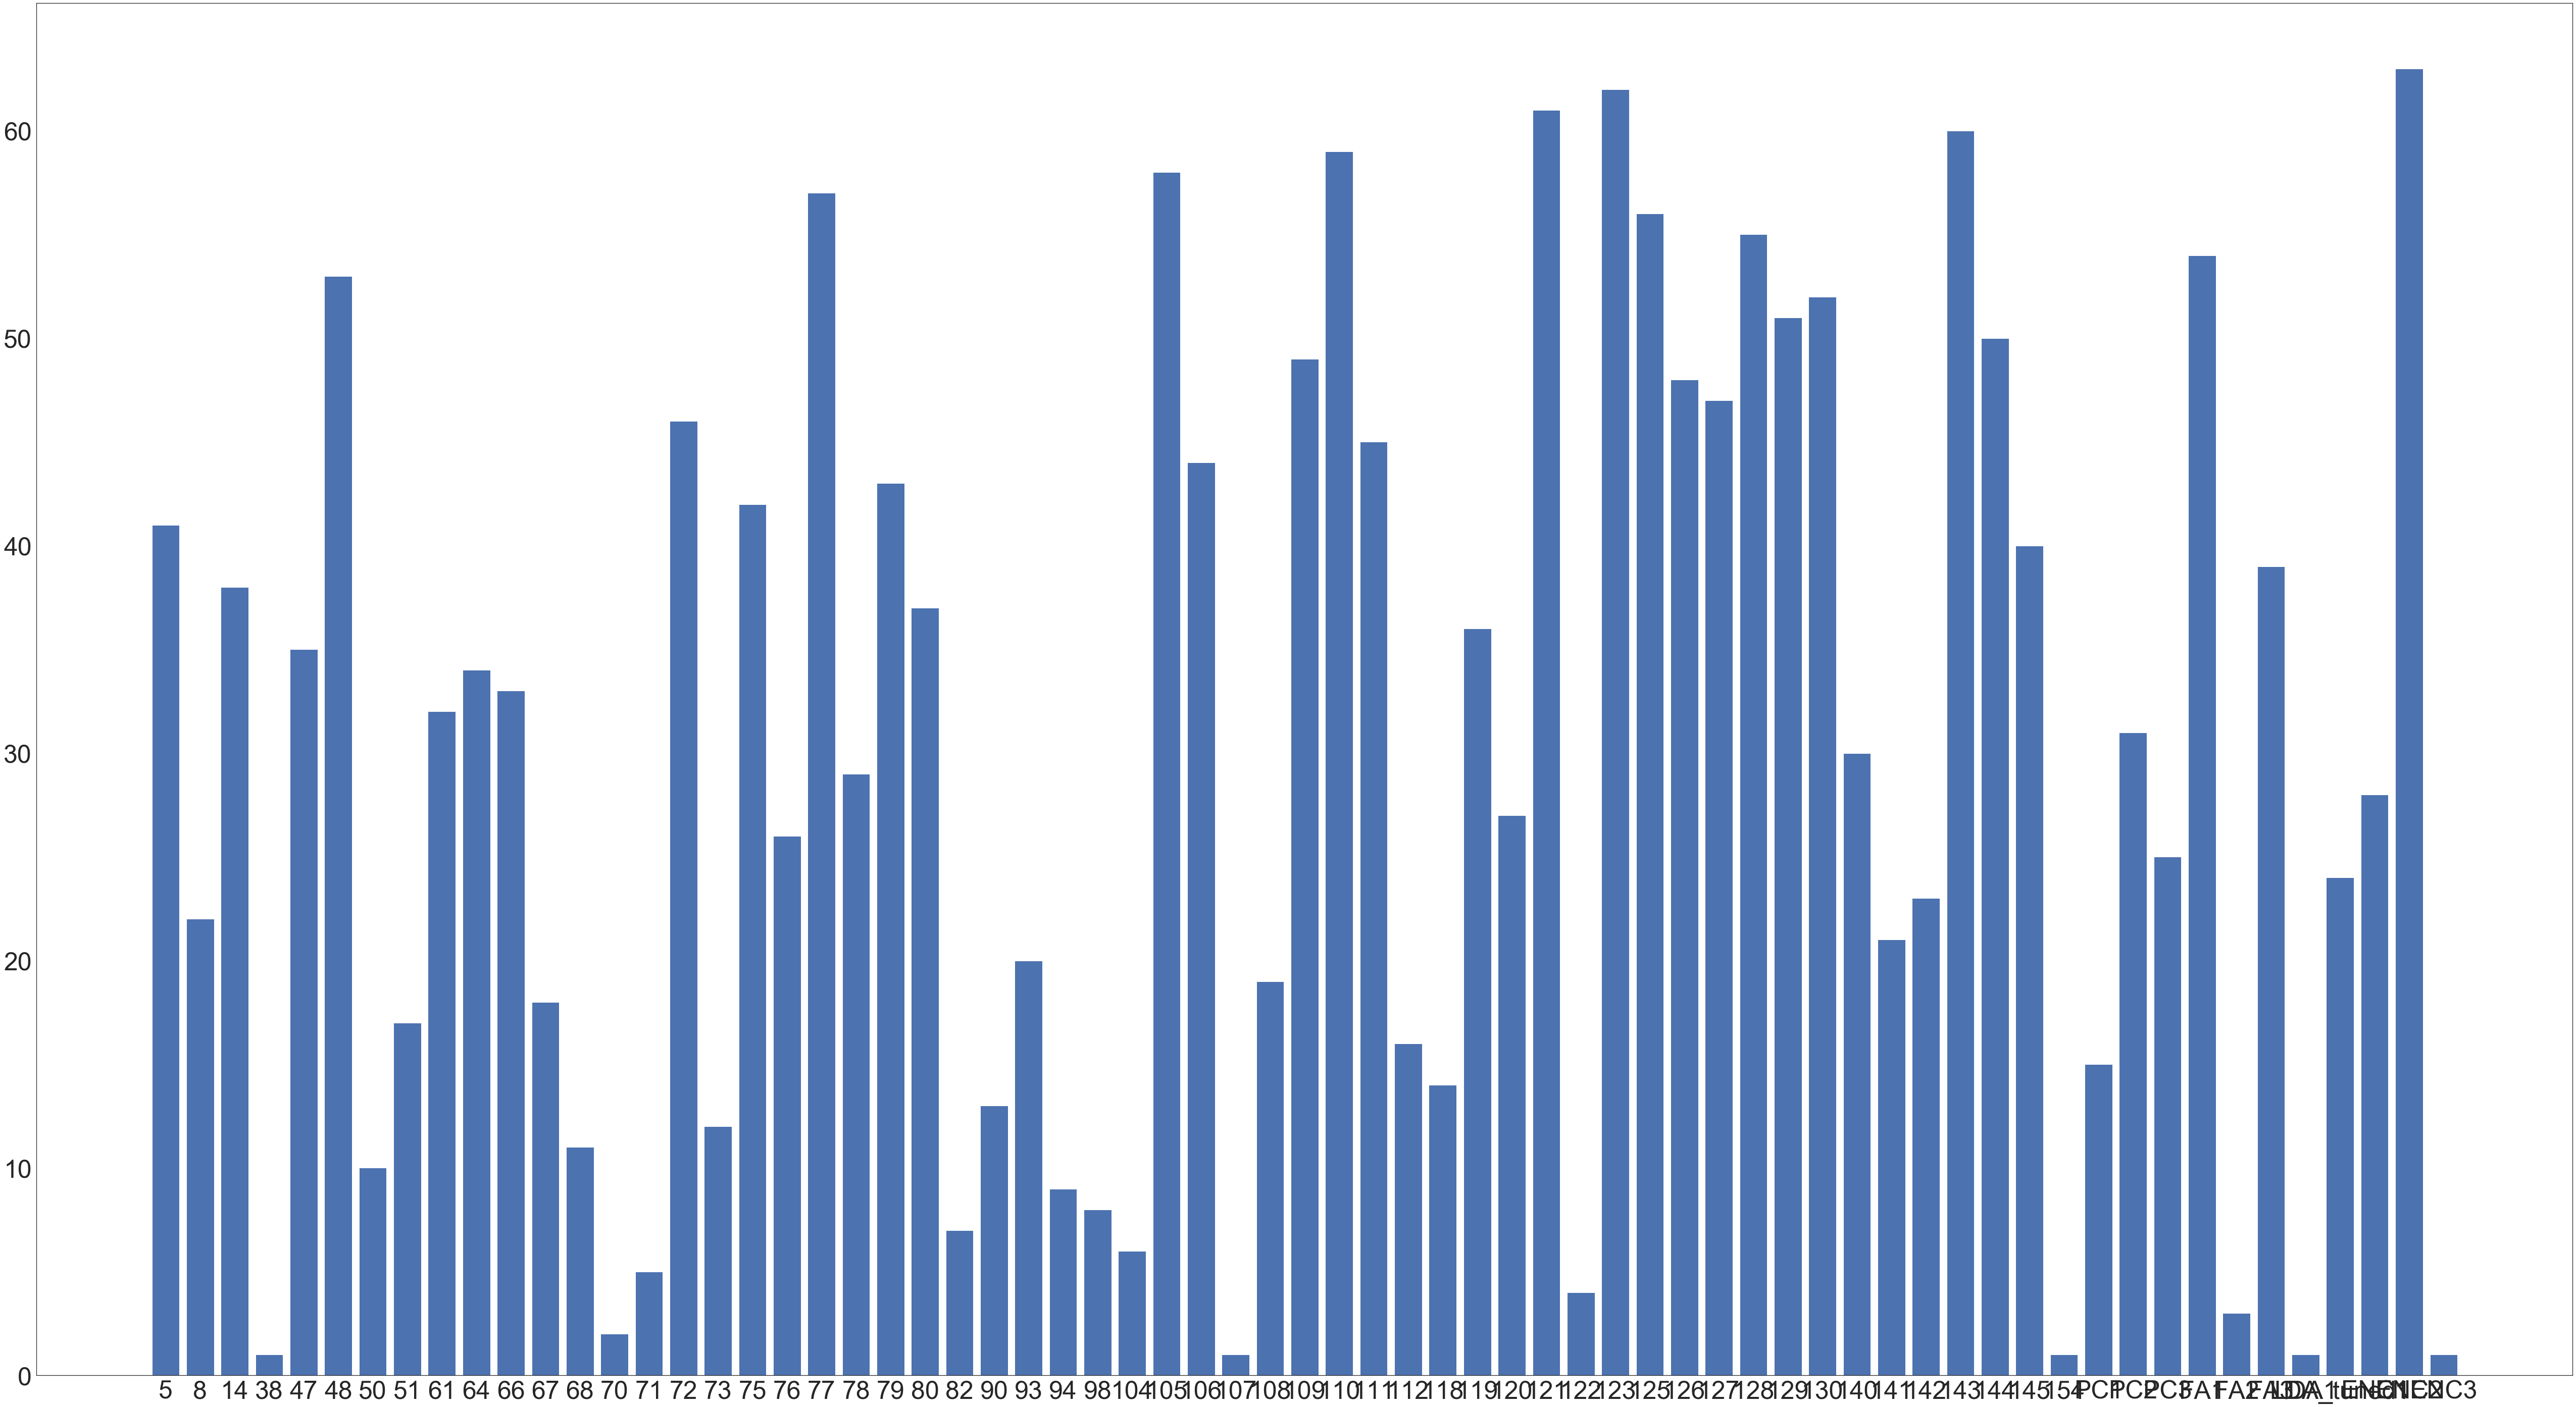

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def df_RFE(df, clf_name, params={}, k=k):
    # feature extraction
    model = clf_name(**params)
    rfe = RFE(model, k)
    X, Y = get_XY(df)
    fit = rfe.fit(X, Y)
    top_names = []
    for i in range(len(fit.ranking_)):
        if fit.ranking_[i] == 1:
            top_names.append(list(df.columns)[i])

    print("Feature Ranking: %s" % fit.ranking_)


    f, ax = plt.subplots(figsize=(90,50)) 
    ax.tick_params(labelsize=50)
    plt.bar(list(df.columns)[:len(fit.ranking_)], fit.ranking_)

    RFE_df = df[top_names]
    RFE_df.head()

    RFE_df = pd.concat([RFE_df, df[['target']]], axis = 1)

    RFE_df_test = df_test[top_names]
    RFE_df_test = pd.concat([RFE_df_test, df_test[['target']]], axis = 1)
    return RFE_df, RFE_df_test

RFE_df, RFE_df_test = df_RFE(df, clf_name=LogisticRegression, params={'solver':'lbfgs', 'max_iter':500, 'multi_class':'auto'})
#correlations(RFE_df)
RFE_df.head()

## 2.3 Feature Extraction with ExtraTrees

[3.694e-04 9.738e-03 4.188e-07 2.663e-02 2.582e-02 1.038e-05 4.971e-02
 7.225e-02 4.053e-03 7.484e-03 2.541e-02 1.003e-01 3.270e-02 4.432e-03
 7.811e-02 2.516e-04 6.196e-02 1.140e-03 6.772e-04 8.575e-04 7.536e-04
 9.880e-04 1.632e-03 5.070e-02 5.170e-03 2.190e-03 6.755e-03 6.798e-03
 1.894e-04 3.024e-06 9.620e-05 5.096e-03 8.867e-03 8.797e-05 5.637e-03
 1.644e-04 1.260e-04 5.495e-03 1.355e-03 3.039e-03 6.995e-04 8.803e-03
 8.072e-06 8.263e-06 1.928e-03 1.771e-04 3.466e-04 3.469e-03 1.012e-03
 1.193e-02 2.458e-03 1.087e-02 1.931e-03 7.135e-06 2.240e-03 1.493e-02
 5.573e-03 1.894e-02 2.499e-03 7.463e-04 1.009e-01 1.480e-02 6.171e-02
 6.378e-02 2.259e-02 0.000e+00 4.060e-02]
[63, 7, 14, 11, 60]


,LDA_tuned1,51,71,67,FA2,target
0,-0.890629,1.534041,1.391247,-0.175252,1.527541,0.0
1,-1.403572,1.534041,-0.718780,1.575793,1.511152,0.0
2,0.638191,-0.651873,-0.718780,0.602982,-0.695519,0.0
3,-1.346886,-0.651873,-0.718780,0.602982,0.000136,0.0
4,-1.246485,-0.651873,-0.718780,0.602982,-0.695645,0.0


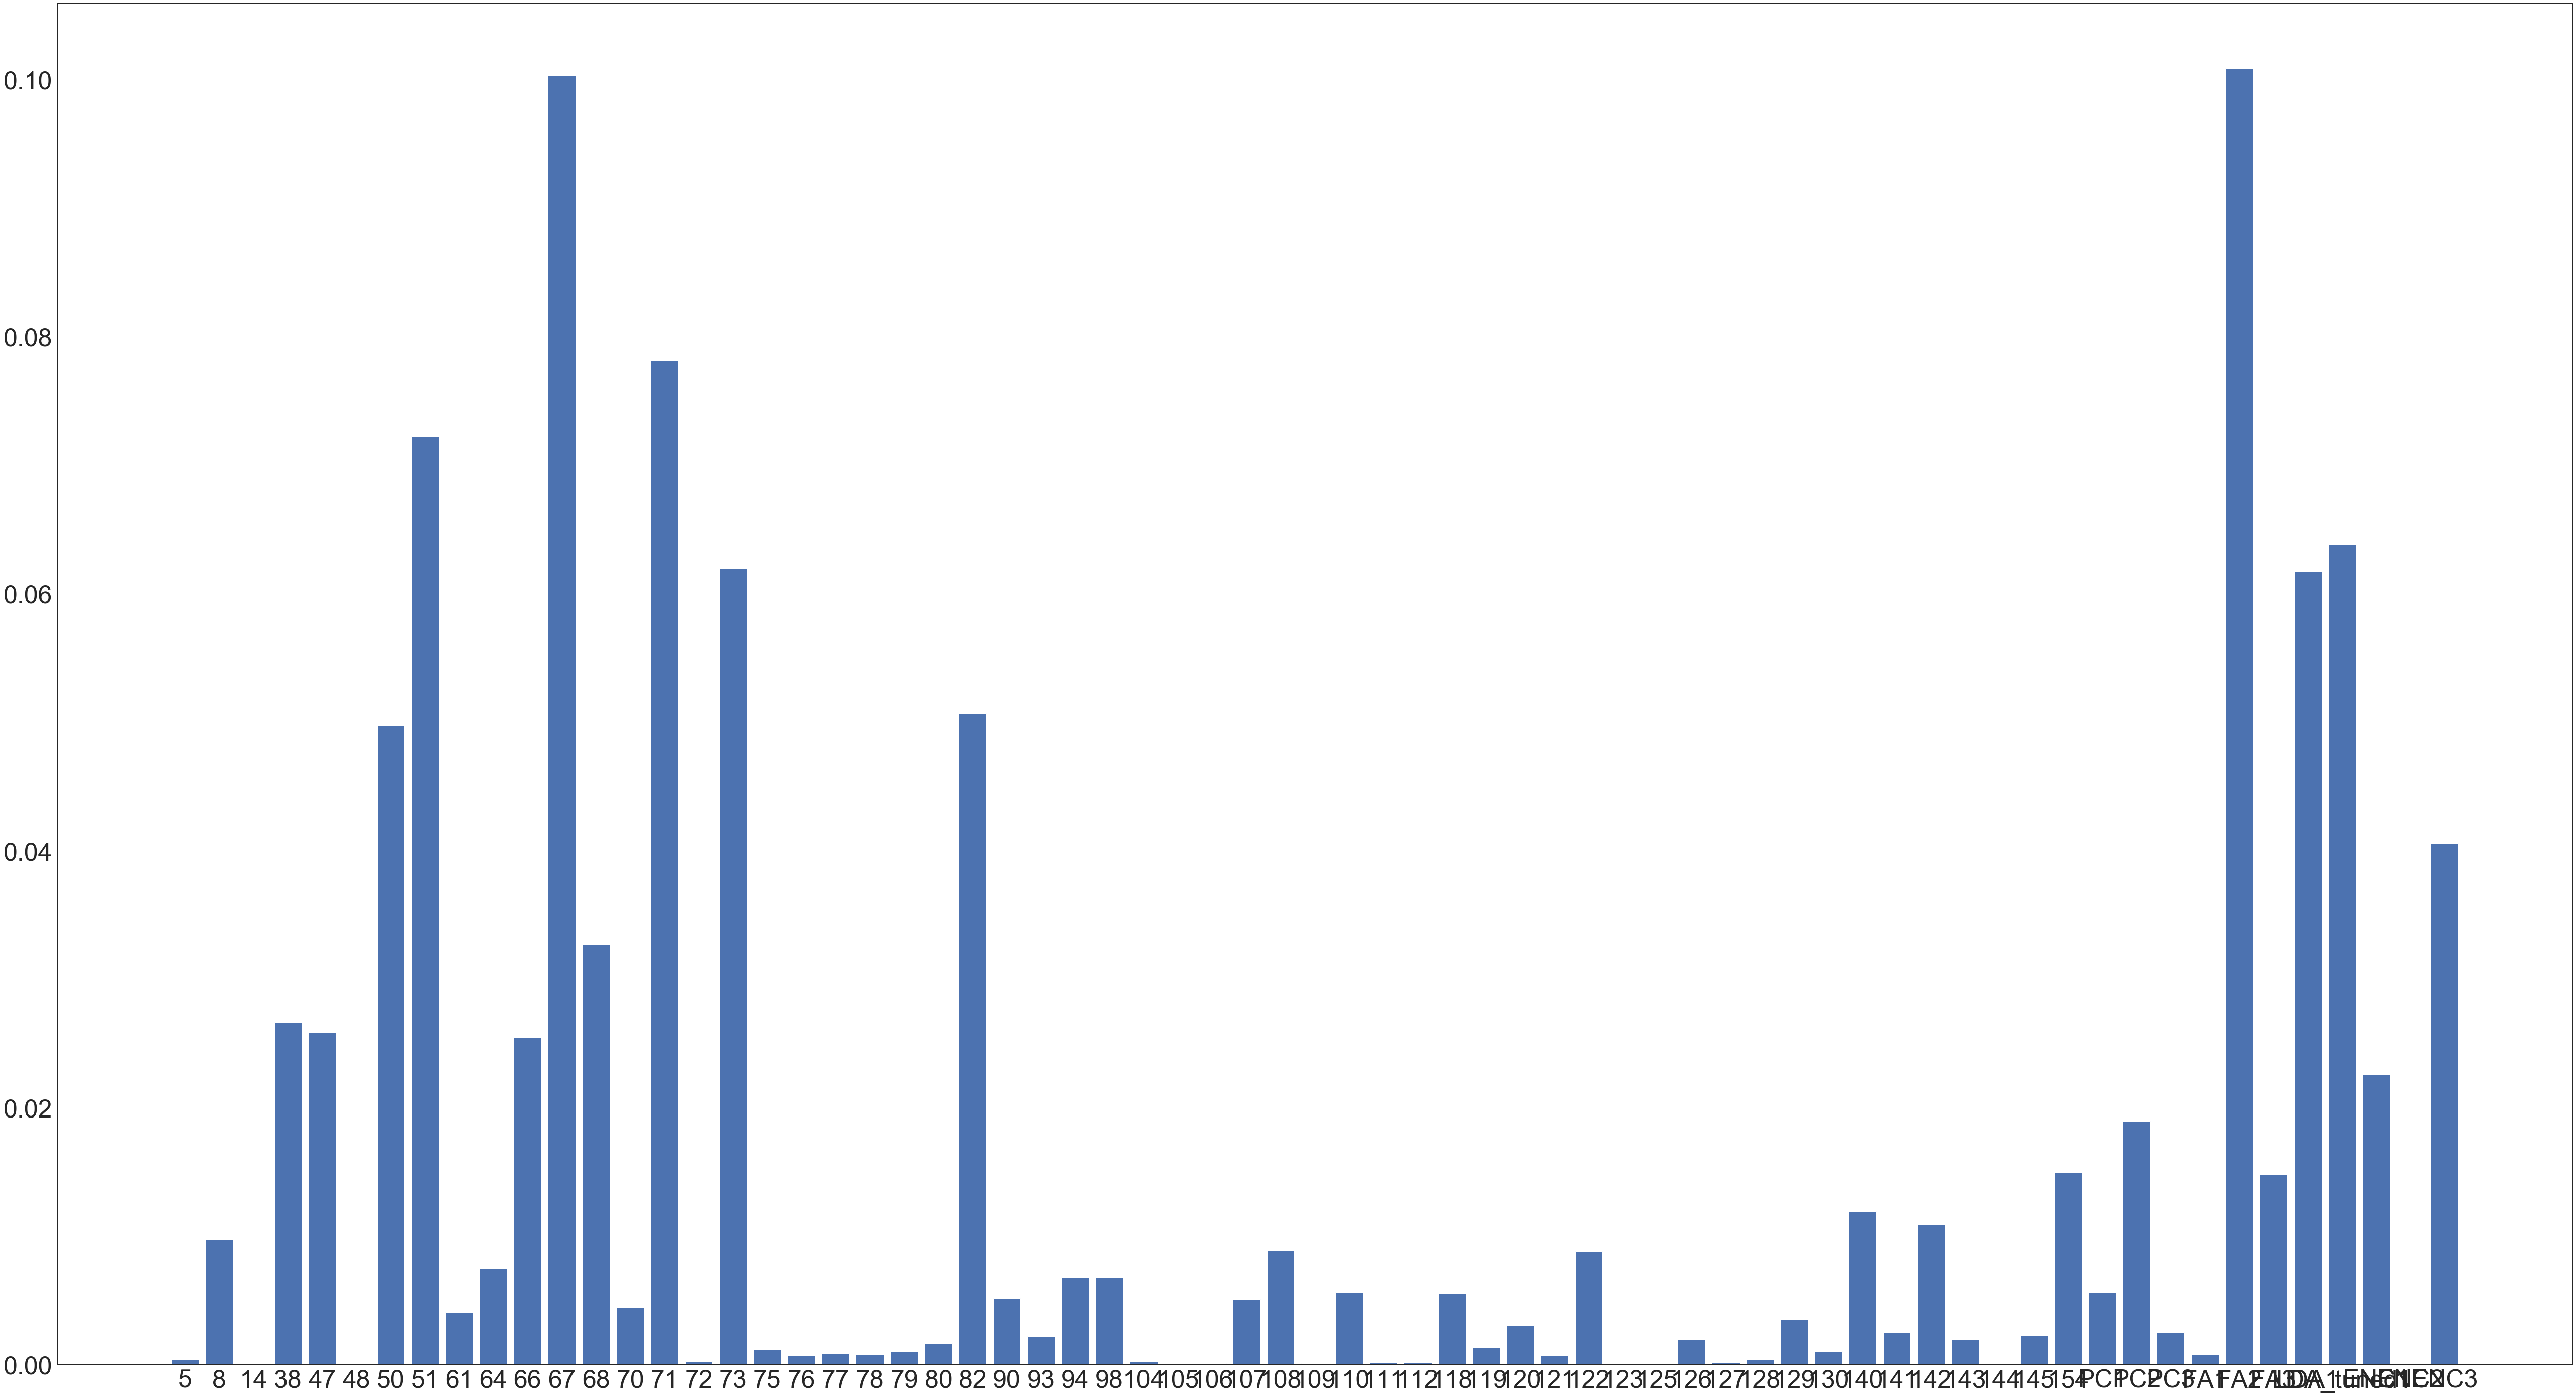

In [39]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

def df_EX(df, k=k):
    # feature extraction
    model = ExtraTreesClassifier(n_estimators=100)
    X,Y = get_XY(df)
    model.fit(X, Y)
    print(model.feature_importances_)

    # One way to determine the cut-off is to select the top 10, 20 features.
    # Alternatively, the top 10th percentile

    f, ax = plt.subplots(figsize=(90,50)) 
    ax.tick_params(labelsize=50)
    plt.bar(list(df.columns)[:len(model.feature_importances_)], model.feature_importances_)

    #number of features to select
    indices_max = sorted(range(len(model.feature_importances_)), key = lambda sub: model.feature_importances_[sub])[-k:] 
    print(indices_max)
    top_names = []
    for i in indices_max:
        top_names.append(list(df.columns)[i])
    EX_df = df[top_names]

    EX_df = pd.concat([EX_df, df[['target']]], axis = 1)

    EX_df_test = df_test[top_names]
    EX_df_test = pd.concat([EX_df_test, df_test[['target']]], axis = 1)
    return EX_df, EX_df_test

EX_df, EX_df_test = df_EX(df)
#correlations(EX_df)
EX_df.head()

# 3 - Exploring and Selecting ML Algorithms

## Initial Data Pipeline

In [40]:
# Compare Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # variables are collinear
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier # higher accuracy achieved with 4 features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC # very slow / high computational time

def compare_models(df):
    X,Y = get_XY(df)
    # prepare models
    models = []
    models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=300)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    #models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('EX', ExtraTreesClassifier()))
    #models.append(('MLP', MLPClassifier())) # very slow / high computational time
    #models.append(('SVM', SVC(kernel='sigmoid', gamma='auto'))) # very slow / high computational time

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111) 
    plt.boxplot(results) 
    ax.set_xticklabels(names)
    plt.show()

# Baseline Accuracy

LR: 0.947115 (0.101375)
LDA: 0.964304 (0.065782)
CART: 0.760862 (0.371820)
NB: 0.956431 (0.069650)
RF: 0.986006 (0.036260)
EX: 0.987582 (0.034922)


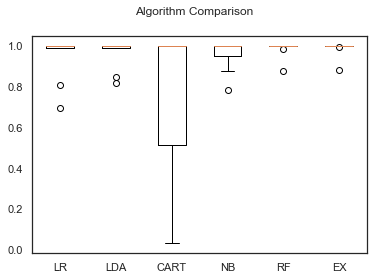

In [41]:
compare_models(df_backup)

# Accuracy after Cleaning

# Accuracy after different Re-Scaling methods

LR: 0.955431 (0.087667)
LDA: 0.964304 (0.065782)
CART: 0.761140 (0.371534)
NB: 0.970136 (0.059445)
RF: 0.986284 (0.038581)
EX: 0.972362 (0.055414)


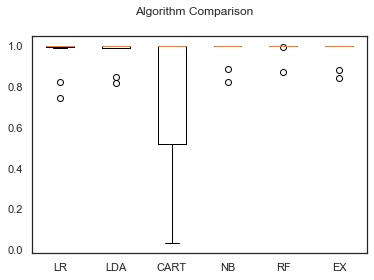

LR: 0.946734 (0.103060)
LDA: 0.964273 (0.065790)
CART: 0.760862 (0.371847)
NB: 0.974918 (0.048817)
RF: 0.962892 (0.092836)
EX: 0.985707 (0.035205)


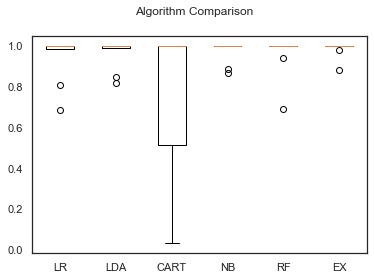

LR: 0.903648 (0.220478)
LDA: 0.964304 (0.065782)
CART: 0.761129 (0.371555)
NB: 0.895511 (0.138883)
RF: 0.960748 (0.083195)
EX: 0.987850 (0.034813)


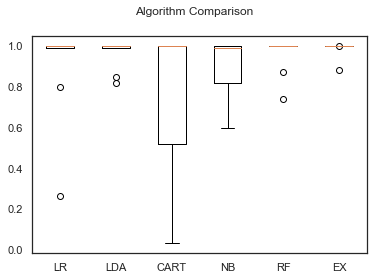

LR: 0.947146 (0.097881)
LDA: 0.965437 (0.063749)
CART: 0.929328 (0.158036)
NB: 0.960140 (0.085612)
RF: 0.974062 (0.050873)
EX: 0.972042 (0.056167)


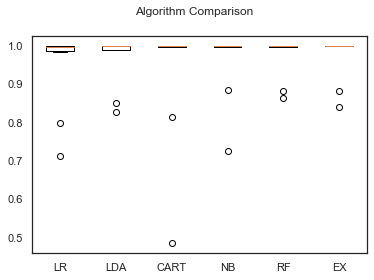

LR: 0.984151 (0.035898)
LDA: 0.986109 (0.036617)
CART: 0.969848 (0.061437)
NB: 0.985954 (0.036198)
RF: 0.987984 (0.034163)
EX: 0.969848 (0.061379)


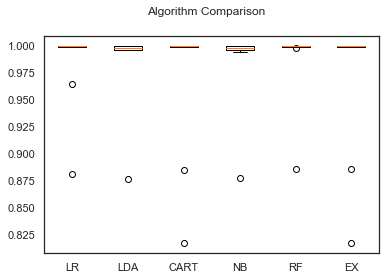

In [42]:
# rescaled, standardized, robust_scaled, normalized, binarized

compare_models(rescaled(clean(df_backup)))
compare_models(standardized(clean(df_backup)))
compare_models(robust_scaled(clean(df_backup)))
compare_models(normalized(clean(df_backup)))
compare_models(binarized(clean(df_backup)))

# Accuracy after feature Construction

LR: 0.949619 (0.096273)
LDA: 0.964087 (0.066119)
CART: 0.874711 (0.292865)
NB: 0.958996 (0.089773)
RF: 0.910583 (0.261703)
EX: 0.986768 (0.034888)


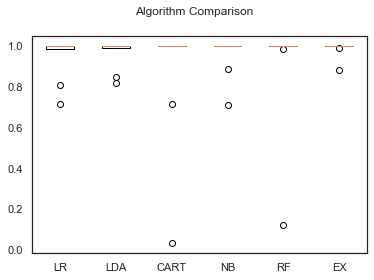

In [43]:
compare_models(df)

# Accuracy after Feature Selection

LR: 0.984058 (0.036127)
LDA: 0.984708 (0.037644)
CART: 0.969363 (0.045553)
NB: 0.963345 (0.074670)
RF: 0.980956 (0.035134)
EX: 0.979184 (0.037196)


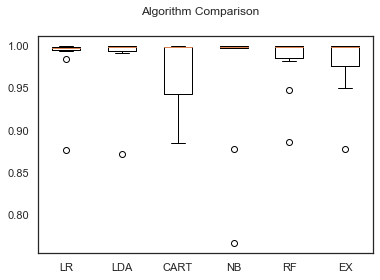

In [44]:
compare_models(chi2_df)

## 3.1 Decision Tree Classifier

              precision    recall  f1-score   support

         0.0     0.6922    0.9916    0.8153     20079
         1.0     0.9853    0.5590    0.7133     20079

    accuracy                         0.7753     40158
   macro avg     0.8387    0.7753    0.7643     40158
weighted avg     0.8387    0.7753    0.7643     40158



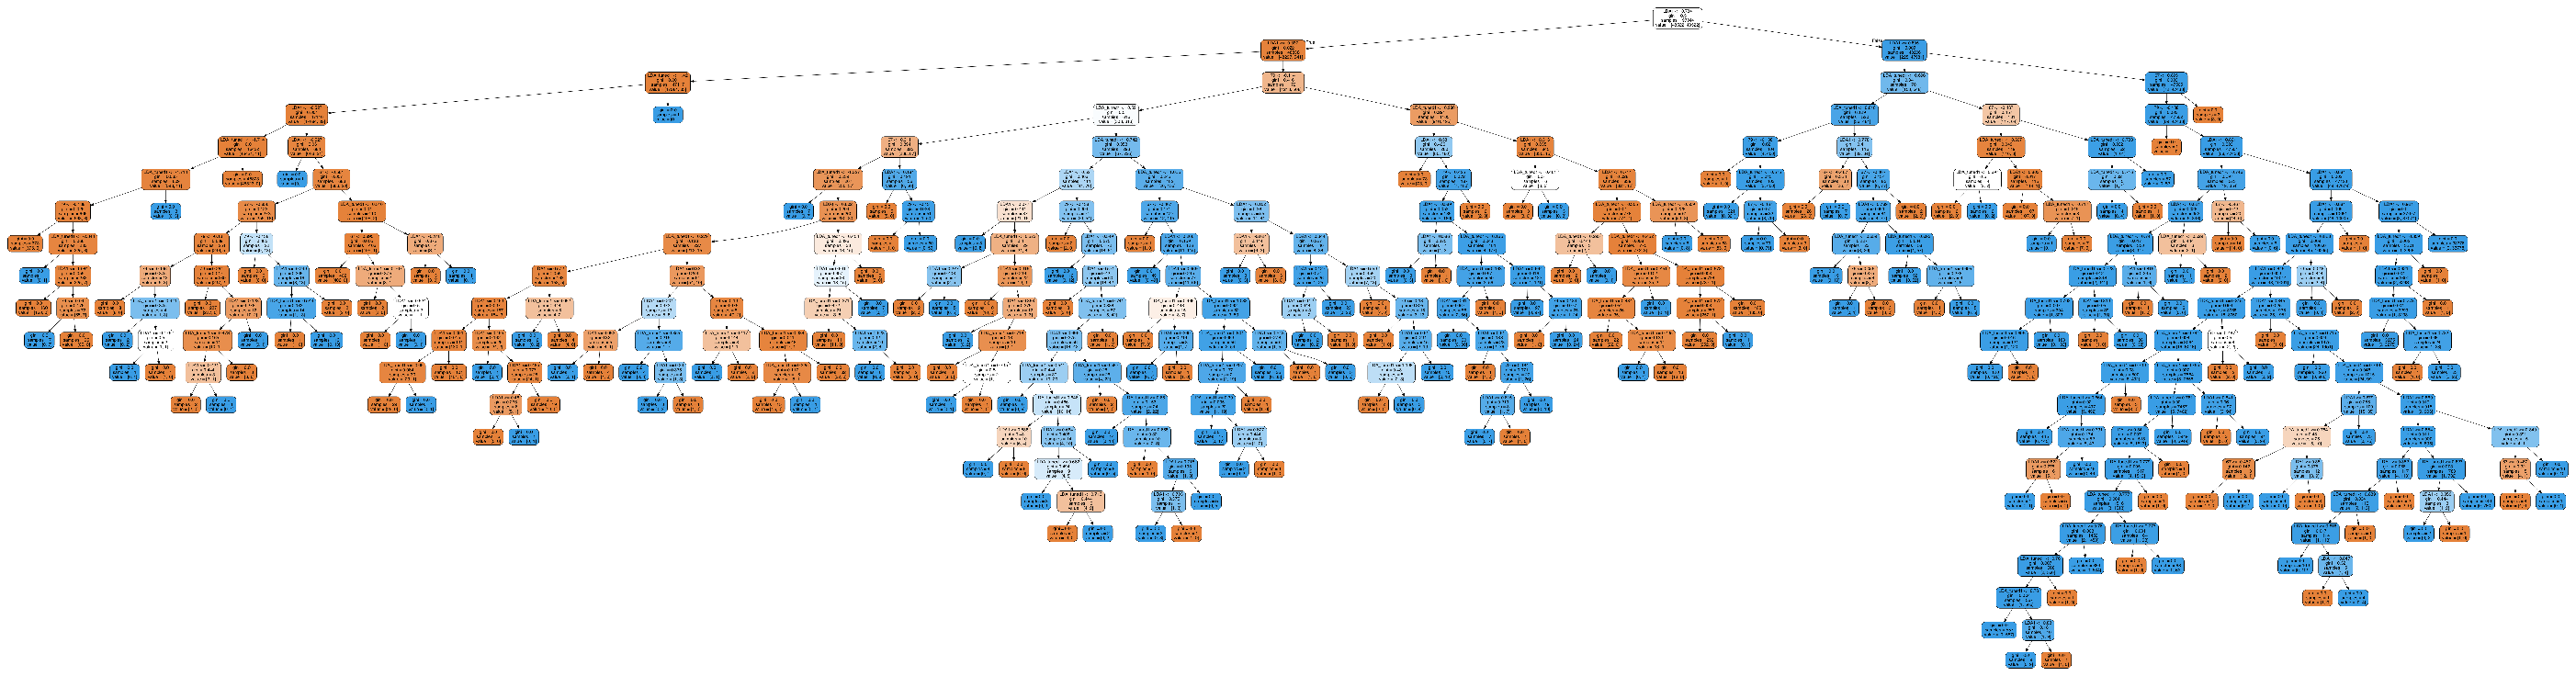

In [45]:
# CART Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

def CART(df, df_test=df_test):
    
    names = df.columns[:len(df.columns)-1]
    X_train, Y_train = get_XY(df)
    X_test, Y_test = get_XY(df_test)
    
    # fit a model
    model = DecisionTreeClassifier() 
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)

    # Cross Validation Classification Report
    from sklearn.metrics import classification_report
    report = classification_report(Y_test, predicted, digits=4) 
    print(report)

    from sklearn.tree import export_graphviz
    export_graphviz(model, out_file='pima_tree.dot', feature_names=names, rounded=True, filled=True)
    # convert .dot to .png
    # from subprocess import check_call
    # check_call(['dot','-Tpng','pima_tree.dot','-o','pima_tree.png'])

    # if pydot is installed use the below
    !dot -Tpng pima_tree.dot -o pima_tree.png -Gdpi-600

    # display in python
    plt.figure(figsize = (50,100)) 
    plt.imshow(plt.imread('pima_tree.png')) 
    plt.axis('off')
    plt.show()
    
CART(chi2_df, chi2_df_test)
#CART(RFE_df, RFE_df_test)
#CART(EX_df, EX_df_test)

## 3.2 SVM Classifier attempt (not used in the end)

## Visualize the Decision Boundary

In [46]:
'''to_keep = ['38','50','107','LDA1','target']
df_best, df_test_best = df.loc[:,to_keep], df_test.loc[:,to_keep]

#Visualize the Decision Boundary
from sklearn import svm

X_train, Y_train = get_XY(df_best)
#X_test, Y_test = get_XY(chi2_df_test)

np.random.seed(0)

# fit the model
fig = plt.figure(figsize = (12,12))
clf = svm.NuSVC(gamma='auto')
clf.fit(X_train, Y_train)
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(2)]).T
pred = clf.decision_function(Xpred).reshape(X1.shape)    
plt.contourf(X1, X2, pred,
             alpha=1.0, cmap="RdYlGn", levels=np.linspace(pred.min(), pred.max(), 100))
plt.scatter(X_train[:, 0], X_train[:, 2], s=30, c=Y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.title('SVM (Test set)')
plt.show()'''

'to_keep = [\'38\',\'50\',\'107\',\'LDA1\',\'target\']\ndf_best, df_test_best = df.loc[:,to_keep], df_test.loc[:,to_keep]\n\n#Visualize the Decision Boundary\nfrom sklearn import svm\n\nX_train, Y_train = get_XY(df_best)\n#X_test, Y_test = get_XY(chi2_df_test)\n\nnp.random.seed(0)\n\n# fit the model\nfig = plt.figure(figsize = (12,12))\nclf = svm.NuSVC(gamma=\'auto\')\nclf.fit(X_train, Y_train)\nX1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),\n                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))\nXpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(2)]).T\npred = clf.decision_function(Xpred).reshape(X1.shape)    \nplt.contourf(X1, X2, pred,\n             alpha=1.0, cmap="RdYlGn", levels=np.linspace(pred.min(), pred.max(), 100))\nplt.scatter(X_train[:, 0], X_train[:, 2], s=30, c=Y_train, cmap=plt.cm.Paired, edgecolors=\'k\')\nplt.xti

## Test Accuracy

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # variables are collinear
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier # higher accuracy achieved with 4 features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
#from sklearn.svm import SVC # very slow / high computational time

def train_model(clf_name, df=df, params={}):
    
    X_train, Y_train = get_XY(df)
    
    # fit a model
    model = clf_name(**params) 
    model.fit(X_train, Y_train)
    return model

def test_model(model, df_test=df_test):
    
    X_test, Y_test = get_XY(df_test)
    
    predicted = model.predict(X_test)

    return predicted

def class_acc_report(model, df=df, df_test=df_test, params={}, verbose=True):
    
    # fit a model
    model = train_model(model, df=df, params=params) 
    predicted = test_model(model=model, df_test=df_test)

    # Cross Validation Classification Report
    report = classification_report(Y_test, predicted, digits=4) 
    if verbose: print(report)
    return model, predicted

#class_acc_report(LogisticRegression, standardized(df), standardized(df_test))
#class_acc_report(LogisticRegression, chi2_df, chi2_df_test)
#class_acc_report(LogisticRegression, RFE_df, RFE_df_test)
#class_acc_report(LogisticRegression, EX_df, EX_df_test)
#class_acc_report(LogisticRegression, df_lda_only, df_lda_only_test)
#class_acc_report(LogisticRegression, df_pca_only, df_pca_only_test)
#class_acc_report(LogisticRegression, df_encoded_only, df_encoded_only_test)

In [48]:
#class_acc_report(LinearDiscriminantAnalysis, df, df_test)
#class_acc_report(LinearDiscriminantAnalysis, df_lda_only, df_lda_only_test)

In [49]:
#class_acc_report(ExtraTreesClassifier, df, df_test)
#class_acc_report(ExtraTreesClassifier, chi2_df, chi2_df_test)
#class_acc_report(ExtraTreesClassifier, RFE_df, RFE_df_test)
#class_acc_report(ExtraTreesClassifier, EX_df, EX_df_test)

In [50]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [51]:
best_params_MLP={'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_iter': 250,
 'momentum': 0.1,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.0,
 'warm_start': False}

to_keep = ['38','50','107','LDA1','LDA_tuned1','target']
df_best, df_test_best = df.loc[:,to_keep], df_test.loc[:,to_keep]
class_acc_report(MLPClassifier, df_best, df_test_best, best_params_MLP)

              precision    recall  f1-score   support

         0.0     0.9992    0.9978    0.9985     20079
         1.0     0.9978    0.9992    0.9985     20079

    accuracy                         0.9985     40158
   macro avg     0.9985    0.9985    0.9985     40158
weighted avg     0.9985    0.9985    0.9985     40158



(MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.01, max_iter=250, momentum=0.1,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=True, solver='adam', tol=0.0001,
               validation_fraction=0.0, verbose=False, warm_start=False),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [52]:
class_acc_report(KNeighborsClassifier, df_best, df_test_best)

              precision    recall  f1-score   support

         0.0     0.9993    0.9907    0.9950     20079
         1.0     0.9908    0.9994    0.9950     20079

    accuracy                         0.9950     40158
   macro avg     0.9951    0.9950    0.9950     40158
weighted avg     0.9951    0.9950    0.9950     40158



(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'), array([0., 0., 0., ..., 1., 1., 1.]))

In [53]:
#class_acc_report(MLPClassifier, RFE_df, RFE_df_test, params={'hidden_layer_sizes': (45,2,11,)})
#class_acc_report(MLPClassifier, RFE_df, RFE_df_test, params={'hidden_layer_sizes': (25,11,7,5,3,)})

In [54]:
#class_acc_report(MLPClassifier, df, df_test)
#class_acc_report(MLPClassifier, chi2_df, chi2_df_test)
#class_acc_report(MLPClassifier, RFE_df, RFE_df_test)
#class_acc_report(MLPClassifier, EX_df, EX_df_test)

In [55]:
#class_acc_report(GaussianNB, df, df_test)
#class_acc_report(GaussianNB, chi2_df, chi2_df_test)
#class_acc_report(GaussianNB, RFE_df, RFE_df_test)
#class_acc_report(GaussianNB, EX_df, EX_df_test)

In [56]:
#class_acc_report(SVC, df, df_test)
#class_acc_report(SVC, chi2_df, chi2_df_test)
#class_acc_report(SVC, RFE_df, RFE_df_test)
#class_acc_report(SVC, EX_df, EX_df_test)

In [57]:
#class_acc_report(KNeighborsClassifier, df, df_test)
#class_acc_report(KNeighborsClassifier, chi2_df, chi2_df_test)
#class_acc_report(KNeighborsClassifier, RFE_df, RFE_df_test)
#class_acc_report(KNeighborsClassifier, EX_df, EX_df_test)

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data

# Training classifiers
#clf1 = DecisionTreeClassifier(max_depth=4)
#clf2 = KNeighborsClassifier(n_neighbors=7)
#clf3 = SVC(gamma='scale', kernel='rbf', probability=True)

X_train, Y_train = get_XY(df)
X_test, Y_test = get_XY(df_test)

#SVC #knn
clf1 = ExtraTreesClassifier()
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()
clf4 = MLPClassifier()
clf5 = KNeighborsClassifier()
eclf = VotingClassifier(estimators=[('ex', clf1), ('rf', clf2), ('lr', clf3), ('mlp', clf4), ('nb', clf5)],
                        voting='soft', weights=[1, 1, 3, 2, 1])

clf1 = clf1.fit(X_train, Y_train)
clf2 = clf2.fit(X_train, Y_train)
clf3 = clf3.fit(X_train, Y_train)
clf4 = clf4.fit(X_train, Y_train)
clf5 = clf5.fit(X_train, Y_train)
eclf = eclf.fit(X_train, Y_train)

predicted = eclf.predict(X_test)

# Cross Validation Classification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted, digits=4) 
print(report)

report1 = classification_report(Y_test, clf1.predict(X_test), digits=4) 
print(report1)
report2 = classification_report(Y_test, clf2.predict(X_test), digits=4) 
print(report2)
report3 = classification_report(Y_test, clf3.predict(X_test), digits=4) 
print(report3)
report4 = classification_report(Y_test, clf4.predict(X_test), digits=4) 
print(report4)
report5 = classification_report(Y_test, clf5.predict(X_test), digits=4) 
print(report5)

## 3.4 Ensemble Methods

In [58]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

ensemble=False

if ensemble:
    # Training classifiers
    #clf1 = DecisionTreeClassifier(max_depth=4)
    #clf2 = KNeighborsClassifier(n_neighbors=7)
    #clf3 = SVC(gamma='scale', kernel='rbf', probability=True)

    X_train, Y_train = get_XY(df.loc[:,to_keep])
    X_test, Y_test = get_XY(df_test.loc[:,to_keep])

    #SVC #knn
    clf1 = MLPClassifier()
    clf2 = MLPClassifier()
    clf3 = MLPClassifier()
    eclf = VotingClassifier(estimators=[('mlp1', clf1), ('mlp2', clf2), ('mlp3', clf3),],
                            voting='soft', weights=[1, 1, 1])

    clf1 = clf1.fit(X_train, Y_train)
    clf2 = clf2.fit(X_train, Y_train)
    clf3 = clf3.fit(X_train, Y_train)
    eclf = eclf.fit(X_train, Y_train)

    predicted = eclf.predict(X_test)

    # Cross Validation Classification Report
    from sklearn.metrics import classification_report
    report = classification_report(Y_test, predicted, digits=4) 
    print(report)

    report1 = classification_report(Y_test, clf1.predict(X_test), digits=4) 
    print(report1)
    report2 = classification_report(Y_test, clf2.predict(X_test), digits=4) 
    print(report2)
    report3 = classification_report(Y_test, clf3.predict(X_test), digits=4) 
    print(report3)

# 4 - Refining Algorithms

In [59]:
#inspect the default parameters of the MLPClassifier
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## 4.1 Tuning using Random Seach CV

In [60]:
from sklearn.model_selection import RandomizedSearchCV

def random_search_parameters(df, df_test, clf_name, params, cv=2):
    X_train, Y_train = get_XY(df)
    X_test, Y_test = get_XY(df_test)
    clf = clf_name()
    clf = clf.fit(X_train, Y_train)
    random_search = RandomizedSearchCV(estimator=clf,param_distributions=params,verbose=0,cv=cv)
    random_search.fit(X_train, Y_train)
    print('train score is: '+str(random_search.score(X_train,Y_train)))
    print('test score is: '+str(random_search.score(X_test,Y_test)))
    return random_search.best_params_

params = {'activation': ['relu'],
 'alpha': [0.00001,0.0001,0.001],
 'batch_size': ['auto'],
 'beta_1': [0.8,0.9],
 'beta_2': [0.9,0.999],
 'early_stopping': [False],
 'epsilon': [1e-06,1e-08,1e-10],
 'hidden_layer_sizes': [(100,)],
 'learning_rate': ['constant','adaptive'],
 'learning_rate_init': [0.0001,0.001,0.01],
 'max_iter': [50],
 'momentum': [0.9],
 'n_iter_no_change': [10],
 'nesterovs_momentum': [True],
 'power_t': [0.4,0.5,0.6],
 'random_state': [None],
 'shuffle': [True],
 'solver': ['adam'],
 'tol': [0.001, 0.0001, 0.00001],
 'validation_fraction': [0.1, 0.001],
 'verbose': [False],
 'warm_start': [False]}

#best_params_random_MLP = random_search_parameters(df_best, df_test_best, MLPClassifier, params)
#print(best_params_random_MLP)

best_params_random_MLP = {'warm_start': False, 'verbose': False, 'validation_fraction': 0.1, 'tol': 0.0001, 'solver': 'lbfgs', 'shuffle': True, 'random_state': None, 'power_t': 0.6, 'nesterovs_momentum': True, 'momentum': 0.95, 'max_iter': 300, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'epsilon': 1e-08, 'early_stopping': True, 'beta_2': 0.999, 'beta_1': 0.9, 'batch_size': 'auto', 'alpha': 0.12, 'activation': 'tanh'}

{'warm_start': False, 'verbose': False, 'validation_fraction': 0.09, 'tol': 0.0001, 'solver': 'lbfgs', 'shuffle': True, 'random_state': None, 'power_t': 0.8, 'nesterovs_momentum': True, 'momentum': 0.97, 'max_iter': 300, 'learning_rate_init': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'epsilon': 1e-08, 'early_stopping': True, 'beta_2': 0.999, 'beta_1': 0.9, 'batch_size': 'auto', 'alpha': 0.11, 'activation': 'tanh'}

## 4.2 Tuning using Grid Search CV

In [61]:
from sklearn.model_selection import GridSearchCV

params = {'activation': ['relu'],
 'alpha': [0.00001,0.0001,0.001],
 'batch_size': ['auto'],
 'beta_1': [0.8,0.9],
 'beta_2': [0.9,0.999],
 'early_stopping': [False],
 'epsilon': [1e-06,1e-08,1e-10],
 'hidden_layer_sizes': [(100,)],
 'learning_rate': ['constant','adaptive'],
 'learning_rate_init': [0.0001,0.001,0.01],
 'max_iter': [50],
 'momentum': [0.9],
 'n_iter_no_change': [10],
 'nesterovs_momentum': [True],
 'power_t': [0.5],
 'random_state': [None],
 'shuffle': [True],
 'solver': ['adam'],
 'tol': [0.001, 0.0001],
 'validation_fraction': [0.1],
 'verbose': [False],
 'warm_start': [False]}

def grid_search_parameters(df, df_test, clf_name, params, cv=2):
    X_train, Y_train = get_XY(df)
    X_test, Y_test = get_XY(df_test)
    clf = clf_name()
    clf = clf.fit(X_train, Y_train)
    grid_search = GridSearchCV(estimator=clf,param_grid=params,n_jobs=1,verbose=2,cv=cv)
    grid_search.fit(X_train, Y_train)
    print('test score is: '+str(grid_search.score(X_test,Y_test)))
    return grid_search.best_params_

#best_params_grid_MLP = grid_search_parameters(df_best, df_test_best, MLPClassifier, params)
#print(best_params_grid_MLP)

# 5 - Evaluating the Model and Analyizing the Results

In [62]:
to_keep = ['38','50','107','LDA1','LDA_tuned1','target']
df_best, df_test_best = df.loc[:,to_keep], df_test.loc[:,to_keep]
best_model, best_predicted = class_acc_report(MLPClassifier, df_best, df_test_best, best_params_MLP)

              precision    recall  f1-score   support

         0.0     0.9971    0.9955    0.9963     20079
         1.0     0.9955    0.9971    0.9963     20079

    accuracy                         0.9963     40158
   macro avg     0.9963    0.9963    0.9963     40158
weighted avg     0.9963    0.9963    0.9963     40158



## Feature Importance

In [63]:
X_train, Y_train = get_XY(df_best)
perm = PermutationImportance(best_model, random_state=1).fit(X_train, Y_train)
eli5.show_weights(perm, feature_names = to_keep[:-1])

Weight,Feature
0.3540 ± 0.0022,LDA1
0.2238 ± 0.0019,38
0.1473 ± 0.0016,50
0.0167 ± 0.0004,107
0.0045 ± 0.0003,LDA_tuned1


## Accuracy

In [64]:
print('Accuracy on the negative class is:', classification_report(Y_test, best_predicted, output_dict=True)['0.0']['precision'])
print('Accuracy on the positive class is:', classification_report(Y_test, best_predicted, output_dict=True)['1.0']['precision'])
print('Weighted Average Accuracy is:', classification_report(Y_test, best_predicted, output_dict=True)['weighted avg']['precision'])

Accuracy on the negative class is: 0.9970570630486831
Accuracy on the positive class is: 0.9955246146195923
Weighted Average Accuracy is: 0.9962908388341376


## Confusion Matrix

0 - negative, normal traffic
1 - positive, intrusive traffic


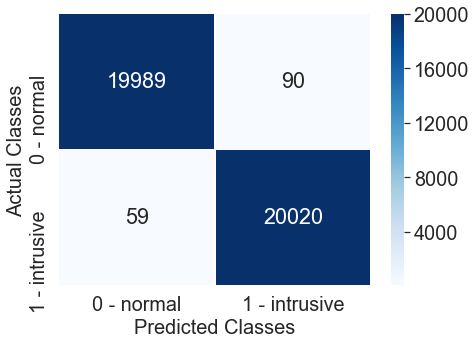

True Negative: 19989
Type I error / False Positive: 90
Type II error / False Negative: 59
True Positive: 20020


In [65]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.8)

def Confusion_Matrix(predicted, Y=Y_test):
    matrix = confusion_matrix(Y, predicted) 
    df = pd.DataFrame({"A": matrix[:,0],
                       "B": matrix[:,1],
                       "C": ["0", "1"],})
    table = pd.pivot_table(df, values=['A','B'], index=[''], columns=[' '], aggfunc=np.sum)
    f, ax = plt.subplots(figsize=(7, 5))
    sns.heatmap(table, annot=True, linewidths=.5, ax=ax, cmap='Blues', fmt='g',
                   xticklabels=['0 - normal','1 - intrusive'], yticklabels=['0 - normal','1 - intrusive'])
    plt.xlabel('Predicted Classes', fontsize=20)
    plt.ylabel('Actual Classes', fontsize=20)
    plt.show()
    return df

from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= 'https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg', width=400, height=400))

print('0 - negative, normal traffic')
print('1 - positive, intrusive traffic')

df_conf = Confusion_Matrix(best_predicted)
TN = df_conf['A'].iloc[0]
FP = df_conf['B'].iloc[0]
FN = df_conf['A'].iloc[1]
TP = df_conf['B'].iloc[1]
print('True Negative:', TN)
print('Type I error / False Positive:', FP)
print('Type II error / False Negative:', FN)
print('True Positive:', TP)

## Sensitivity / True Positive Rate / Recall of the Positive Class

In [66]:
#print(classification_report(Y_test, best_predicted, output_dict=True)['1.0']['recall'])
print('TPR:', TP/(TP+FN))

TPR: 0.9970616066537178


## Specificity / True Negative Rate / Recall of the Negative Class

In [67]:
#print(classification_report(Y_test, best_predicted, output_dict=True)['0.0']['recall'])
print('TNR:', TN/(TN+FP))

TNR: 0.9955177050649933


## False Positive Rate

In [68]:
#print(FP/(FP+TN))
print('FPR:', 1-TN/(TN+FP)) # one minus the TNR

FPR: 0.0044822949350067365


## False Negative Rate

In [69]:
#print(FN/(FN+TP))
print('FNR:', 1-TP/(TP+FN)) # one minus the TPR

FNR: 0.0029383933462822087


Float64Index([1.0, 2.0, 3.0, 4.0], dtype='float64') ['green', 'chartreuse', 'darkorange', 'red']


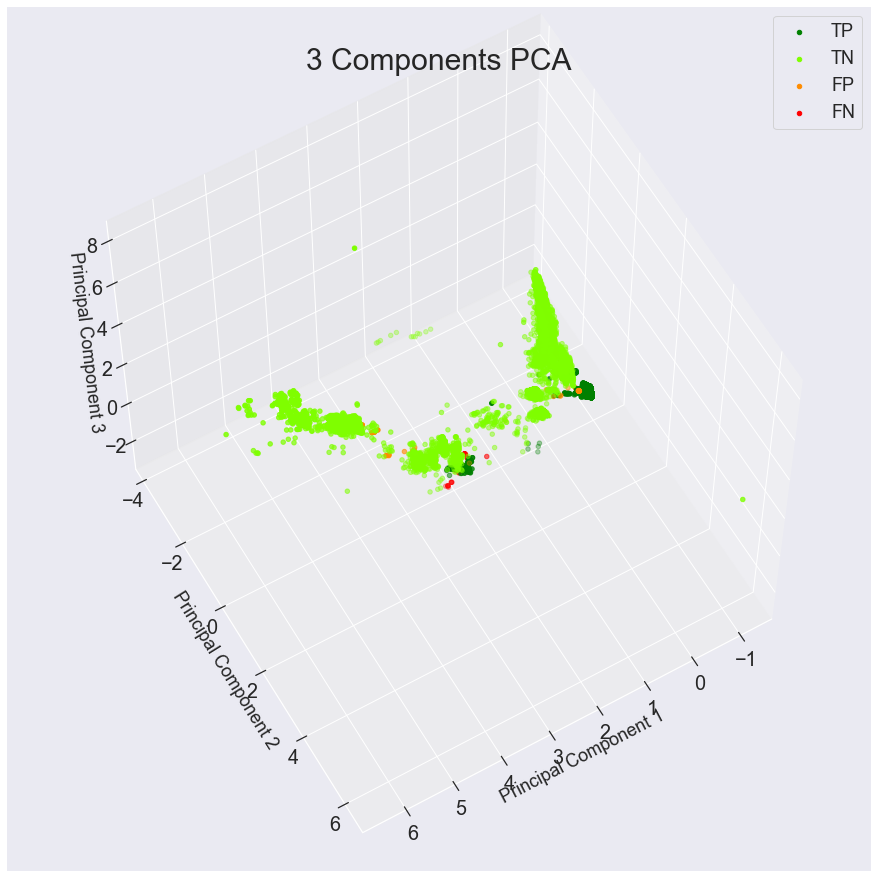

In [70]:
to_keep = ['PC1','PC2','PC3','target']
df_outcome, df_outcome_test = df.loc[:,to_keep], df_test.loc[:,to_keep]

df_outcome_test['target'][(best_predicted==1) & (df_test['target']==1)] = 3
df_TP=df_outcome_test[df_outcome_test['target']==3]
df_outcome_test['target'][(best_predicted==0) & (df_test['target']==0)] = 4
df_TN=df_outcome_test[df_outcome_test['target']==4]
df_outcome_test['target'][(best_predicted==0) & (df_test['target']==1)] = 2
df_FN=df_outcome_test[df_outcome_test['target']==2]
df_outcome_test['target'][(best_predicted==1) & (df_test['target']==0)] = 1
df_FP=df_outcome_test[df_outcome_test['target']==1]
#df_outcome_test['target'][df_outcome_test['target']==3]=0
#df_outcome_test['target'][df_outcome_test['target']==2]=1

def plot_classification_outcome(df_outcome_test=df_outcome_test, predicted=best_predicted, colors=['green', 'chartreuse','darkorange','red'], bars=['TP','TN','FP','FN'], a=60, b=60):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize = (12,12))
    ax = Axes3D(fig)
    ax.set_xlabel('Principal Component 1', fontsize = 18)
    ax.set_ylabel('Principal Component 2', fontsize = 18)
    ax.set_zlabel('Principal Component 3', fontsize = 18)
    ax.set_title('3 Components PCA', fontsize = 30)
    column_els = df_outcome_test['target'].astype('category').cat.categories
    print(column_els, colors)
    dataframes = [df_TP, df_TN, df_FP, df_FN]
    for d, c, color in zip(dataframes, column_els, colors):
        ax.scatter(d.loc[:, 'PC1'],  
                   d.loc[:, 'PC2'],
                   d.loc[:, 'PC3'],  
                    c = [color])
    ax.legend(bars, fontsize = 18)
    ax.grid()
    # rotate the axes and update
    ax.view_init(a, b)

plot_classification_outcome()

## ROC Curve

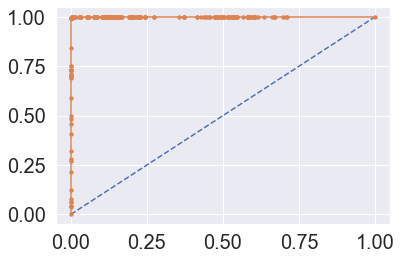

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_ROC(model, df_test):
    X_test, Y_test = get_XY(df_test)
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC

    plt.figure()
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # show the plot
    plt.show()
    
plot_ROC(best_model, df_test_best)

In [72]:
def AUC(model, df_test):
    X_test, Y_test = get_XY(df_test)
    return roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
print('AUC:', AUC(best_model, df_test_best))

AUC: 0.9992871823809275


## Matthews correlation coefficient (MCC)

In [73]:
from sklearn.metrics import matthews_corrcoef

print(matthews_corrcoef(y_true=Y_test, y_pred=best_predicted))

0.9925804946927883


## Time taken to build the model (TTB) & Time taken to test the model (TTM)

In [74]:
import time
def get_time(f, params={}):
    start = time.time()
    out=f(**params)
    end = time.time()
    return end-start, out

print("Time taken to build the model (TTB) is:", get_time(train_model, {"clf_name":MLPClassifier, "df":df_best}))
print("Time taken to test the model (TTM) is:", get_time(test_model, {"model":best_model, "df_test":df_test_best}))
#print("Time to plot Confusion_Matrix is:", get_time(Confusion_Matrix, {"predicted" : best_predicted}))
#print("Time to plot AUC is:", get_time(AUC, {"model" : best_model, "df_test" : df_test_best}))

Time taken to build the model (TTB) is: (13.36365008354187, MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False))
Time taken to test the model (TTM) is: (0.03887677192687988, array([0., 0., 0., ..., 1., 1., 1.]))


In [75]:
def get_acc_measures(clf_name, best_params={}): #not tuned
    to_keep = ['38','50','107','LDA1','LDA_tuned1','target']
    df_best, df_test_best = df.loc[:,to_keep], df_test.loc[:,to_keep]
    X_train_best, Y_train_best = get_XY(df_best) 
    X_test_best, Y_test_best = get_XY(df_test_best)
    TTB, model = get_time(train_model,params={'clf_name':clf_name,'df':df_best,'params':best_params})
    TTM, predicted = get_time(test_model,params={'model':model,'df_test':df_test_best})
    print('train Acc:', np.mean(cross_val_score(model, X_train_best, Y_train_best)))
    print('test Acc:',classification_report(Y_test_best, predicted, output_dict=True)['weighted avg']['precision'])
    print('f1-score:',classification_report(Y_test_best, predicted, output_dict=True)['weighted avg']['f1-score'])
    print('TPR:',classification_report(Y_test_best, predicted, output_dict=True)['1.0']['recall'])
    print('TNR:',classification_report(Y_test_best, predicted, output_dict=True)['0.0']['recall'])
    print('FPR:',1-classification_report(Y_test_best, predicted, output_dict=True)['0.0']['recall'])
    print('FNR:',1-classification_report(Y_test_best, predicted, output_dict=True)['1.0']['recall'])
    print('AUC:',AUC(model, df_test_best))
    print('MCC:',matthews_corrcoef(y_true=Y_test_best, y_pred=predicted))
    print('TTB:',TTB)
    print('TTM:',TTM)
    Confusion_Matrix(predicted)
    plot_ROC(model, df_test_best)

train Acc: 0.9306191006141544
test Acc: 0.9686256932428389
f1-score: 0.967205015895896
TPR: 0.9945216395238806
TNR: 0.9399372478709099
FPR: 0.06006275212909007
FNR: 0.005478360476119382
AUC: 0.9585312191354831
MCC: 0.9358540953720462
TTB: 0.16526103019714355
TTM: 0.0009899139404296875


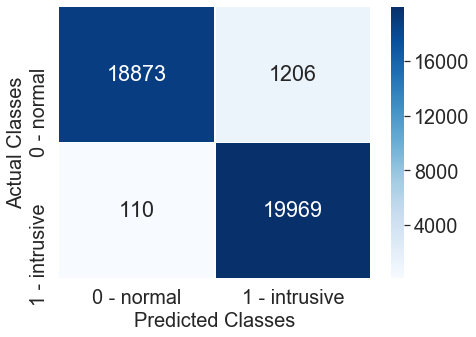

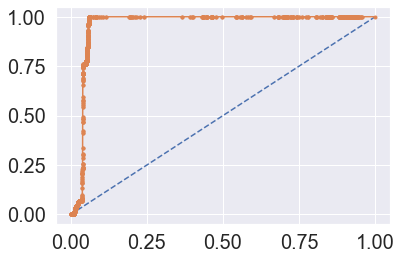

In [76]:
get_acc_measures(LogisticRegression)

train Acc: 0.8699249824821731
test Acc: 0.9336148348802384
f1-score: 0.9238640966851612
TPR: 0.850888988495443
TNR: 0.9976592459783854
FPR: 0.0023407540216145994
FNR: 0.14911101150455697
AUC: 0.9242741172369142
MCC: 0.857838099619371
TTB: 0.18631601333618164
TTM: 0.0017380714416503906


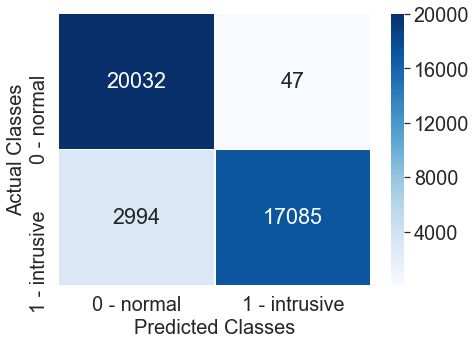

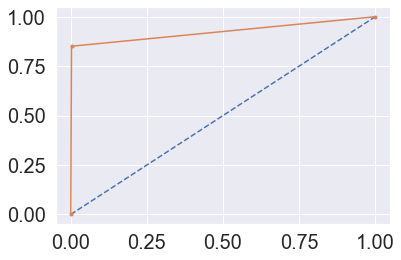

In [77]:
get_acc_measures(DecisionTreeClassifier)

train Acc: 0.7054325872799967
test Acc: 0.9506034942139949
f1-score: 0.9457982595073271
TPR: 0.8950644952437871
TNR: 0.9968125902684397
FPR: 0.0031874097315602867
FNR: 0.10493550475621294
AUC: 0.9979566344693032
MCC: 0.8965299003839229
TTB: 0.6783778667449951
TTM: 0.02027297019958496


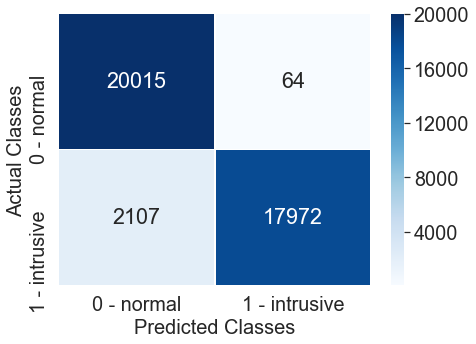

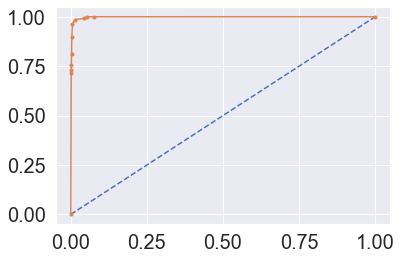

In [78]:
get_acc_measures(RandomForestClassifier)

train Acc: 0.9267239602654467
test Acc: 0.9085079640666088
f1-score: 0.8884002366382504
TPR: 0.7823596792668958
TNR: 0.9970118033766622
FPR: 0.0029881966233378243
FNR: 0.21764032073310424
AUC: 0.987715545111824
MCC: 0.7979717509113893
TTB: 0.1577930450439453
TTM: 0.021043777465820312


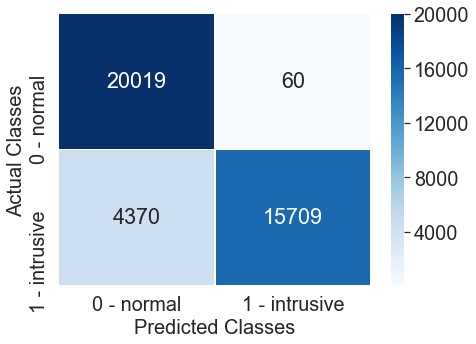

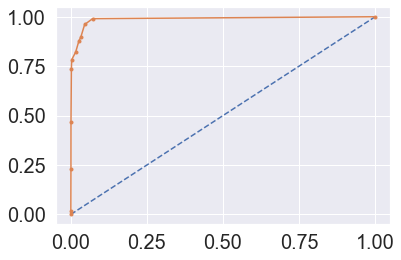

In [79]:
get_acc_measures(ExtraTreesClassifier)

train Acc: 0.9841412142945467
test Acc: 0.9576220865344918
f1-score: 0.9536086528418459
TPR: 0.9999501967229444
TNR: 0.907465511230639
FPR: 0.09253448876936099
FNR: 4.98032770556156e-05
AUC: 0.976025667535988
MCC: 0.9113215345067753
TTB: 0.07399797439575195
TTM: 0.0007941722869873047


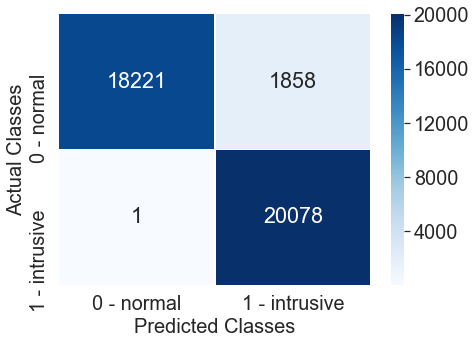

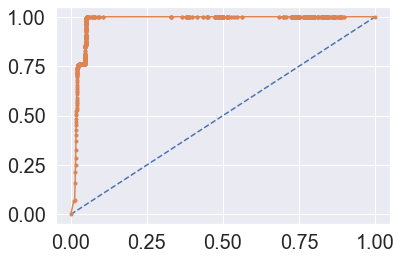

In [80]:
get_acc_measures(LinearDiscriminantAnalysis)

In [81]:
#get_acc_measures(SVC, {'probability':True})

train Acc: 0.9732595523679981
test Acc: 0.25
f1-score: 0.3333333333333333
TPR: 0.0
TNR: 1.0
FPR: 0.0
FNR: 1.0
AUC: 0.49711140993077346
MCC: 0.0
TTB: 0.01978302001953125
TTM: 0.0028595924377441406


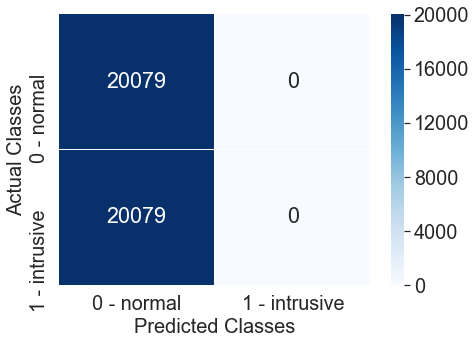

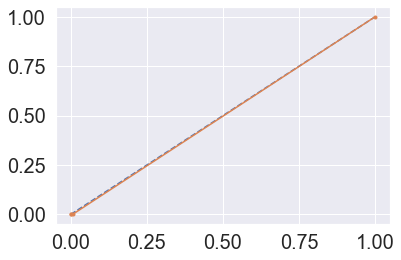

In [82]:
get_acc_measures(GaussianNB)

train Acc: 0.916336919335559
test Acc: 0.9948666555180325
f1-score: 0.994820338304474
TPR: 0.9996513770606106
TNR: 0.9899895413118183
FPR: 0.010010458688181734
FNR: 0.00034862293938942024
AUC: 0.9990991420831785
MCC: 0.9896871136260774
TTB: 13.884219884872437
TTM: 0.03159689903259277


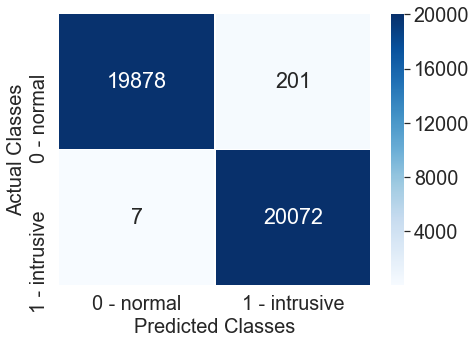

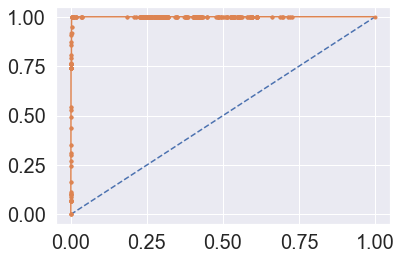

In [83]:
get_acc_measures(MLPClassifier) #not tuned

train Acc: 0.9107518239149252
test Acc: 0.9982592779388046
f1-score: 0.998256883210446
TPR: 0.9993525573982768
TNR: 0.997161213207829
FPR: 0.0028387867921709775
FNR: 0.0006474426017232249
AUC: 0.9993537752581818
MCC: 0.9965161632389852
TTB: 9.422589302062988
TTM: 0.028976917266845703


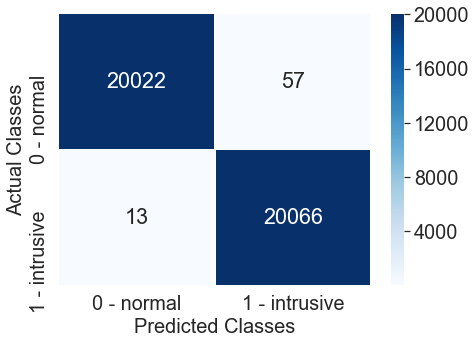

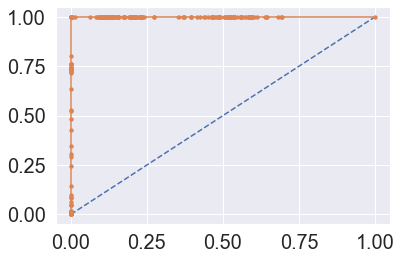

In [84]:
get_acc_measures(MLPClassifier, best_params_MLP) #tuned